3## **Importar bibliotecas**

In [1]:
import pandas as pd 
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay


## **Carregar Dataset**

In [2]:
df = pd.read_csv("train.csv", sep=',')

In [3]:
# profile = ProfileReport(df, title="Profiling Report")
# profile

## **Análise inicial e Compreensão do Dataset**

##### Dataset Columns Description
- ID - unique ID of representative
- Loan Amount - loan amount applied
- Funded Amount - loan amount funded
- Funded Amount Investor - loan amount approved by the investors
- Term - term of loan (in months)
- Batch Enrolled - batch numbers to representatives
- Interest Rate - interest rate (%) on loan
- Grade - grade by the bank
- Sub Grade - sub-grade by the bank
- Employment Duration - duration
- Home Ownership - Ownership of home
- Verification Status - Income verification by the bank
- Payment Plan -if any payment plan has started against loan
- Loan Title - loan title provided
- Debit to Income - ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage
- Delinquency - two years - number of 30+ days delinquency in past 2 years
- Inquires - six months - total number of inquiries in last 6 months
- Open Account - number of open credit line in representative's credit line
- Public Record - number of derogatory public records
- Revolving Balance - total credit revolving balance
- Revolving Utilities - amount of credit a representative is using relative to revolving_balance
- Total Accounts - total number of credit lines available in representatives credit line
- Initial List Status - unique listing status of the loan - W(Waiting), F(Forwarded)
- Total Received Interest - total interest received till date
- Total Received Late Fee - total late fee received till date
- Recoveries -post charge off gross recovery
- Collection Recovery Fee - post charge off collection fee
- Collection 12 months Medical - total collections in last 12 months excluding medical collections
- Application Type - indicates when the representative is an individual or joint
- Last week Pay - indicates how long (in weeks) a representative has paid EMI after batch enrolled
- Accounts Delinquent - number of accounts on which the representative is delinquent
- Total Collection Amount - total collection amount
- Total Current Balance - total current balance from all accounts
- Total Revolving Credit Limit - total revolving credit limit
- Loan Status - 1 = Defaulter, 0 = Non Defaulters

In [4]:
df.shape

(67463, 35)

In [5]:
#Se quisermos ver todas as colunas
pd.set_option('display.max_columns', None)
#Se quisermos ver todas as linhas
#pd.set_option('display.max_rows', None)
df.head(10)

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236            12329.362860    59   
1   1450153         3609          11940            12191.996920    59   
2   1969101        28276           9311            21603.224550    59   
3   6651430        11170           6954            17877.155850    59   
4  14354669        16890          13226            13539.926670    59   
5  50509046        34631          30203             8635.931613    36   
6  32737431        30844          19773            15777.511830    59   
7  63151650        20744          10609             7645.014802    58   
8   4279662         9299          11238            13429.456610    59   
9   4431034        19232           8962             7004.097481    58   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0     BAT2522922      11.135007     B        C4            MORTGAGE   
1     BAT1586599      12.237563     C        D3                RENT   
2     BAT2136391      12.545884     F        D4            MORTGAGE   
3     BAT2428731      16.731201     C        C3            MORTGAGE   
4     BAT5341619      15.008300     C        D4            MORTGAGE   
5     BAT4694572      17.246986     B        G5                RENT   
6     BAT4808022      10.731432     C        C5                RENT   
7     BAT2558388      13.993688     A        A5                 OWN   
8     BAT5341619      11.178457     G        C2            MORTGAGE   
9     BAT2078974       5.520413     C        B5                RENT   

   Home Ownership Verification Status Payment Plan               Loan Title  \
0    176346.62670        Not Verified            n       Debt Consolidation   
1     39833.92100     Source Verified            n       Debt consolidation   
2     91506.69105     Source Verified            n       Debt Consolidation   
3    108286.57590     Source Verified            n       Debt consolidation   
4     44234.82545     Source Verified            n  Credit card refinancing   
5     98957.47561        Not Verified            n  Credit card refinancing   
6    102391.82430            Verified            n         Home improvement   
7     61723.52014        Not Verified            n       Debt consolidation   
8     63205.09072            Verified            n  Credit card refinancing   
9     42015.46586     Source Verified            n  Credit card refinancing   

   Debit to Income  Delinquency - two years  Inquires - six months  \
0        16.284758                        1                      0   
1        15.412409                        0                      0   
2        28.137619                        0                      0   
3        18.043730                        1                      0   
4        17.209886                        1                      3   
5         7.914333                        3                      2   
6        15.083911                        0                      0   
7        29.829715                        0                      0   
8        26.244710                        0                      0   
9        10.048549                        1                      0   

   Open Account  Public Record  Revolving Balance  Revolving Utilities  \
0            13              0              24246            74.932551   
1            12              0                812            78.297186   
2            14              0               1843             2.073040   
3             7              0              13819            67.467951   
4            13              1               1544            85.250761   
5            16              0               2277            51.564476   
6            11              0              14501            46.808804   
7            14              0              13067            23.936624   
8             6              0                549            15.947386   
9            11              0            

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [7]:
df.describe()

ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.451824   
min       36.000000       5.320006    14573.537170         0.675299   
25%       58.000000       9.297147    51689.843335        16.756416   
50%       59.000000      11.377696    69335.832680        22.656658   
75%       59.000000      14.193533    94623.322785        30.048400   
max       59.000000      27.182348   406561.536400        39.629862   

       Delinquency - two years  Inquires - six months  Open Account  \
count             67463.000000           67463.000000  67463.000000   
mean                  0.327127               0.145754     14.266561   
std                   0.800888               0.473291      6.225060   
min                   0.000000               0.000000      2.000000   
25%                   0.000000               0.000000     10.000000   
50%                   0.000000               0.000000     13.000000   
75%                   0.000000               0.000000     16.000000   
max                   8.000000               5.000000     37.000000   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
count   67463.000000       67463.000000         67463.000000    67463.000000   
mean        0.081437        7699.342425            52.889443       18.627929   
std         0.346606        7836.148190            22.539450        8.319246   
min         0.000000           0.000000             0.005172        4.000000   
25%         0.000000        2557.000000            38.658825       13.000000   
50%         0.000000        5516.000000            54.082334       18.000000   
75%         0.000000       10184.500000            69.177117       23.000000   
max         4.000000      116933.000000           100.880050       72.000000   

       Total Received Interest  Total Received Late Fee    Recoveries  \
count             67463.000000             67463.000000  67463.000000   
mean               2068.992542                 1.143969     59.691578   
std                2221.918745                 5.244365    357.026346   
min                   4.736746                 0.000003      0.000036   
25%                 570.903814                 0.021114      1.629818   
50%                1330.842771                 0.043398      3.344524   
75%                2656.956837                 0.071884      5.453727   
max               14301.368310                42.618882   4354.467419   

       Collection Recovery Fee  Collection 12 months Medical  Last week Pay  \
count             67463.000000                  67463.000000   67463.000000   
mean                  1.125141                      0.021301      71.163260   
std                   3.489885                      0.144385      43.315845   
min                   0.000036                      0.000000       0.000000   
25%                   0.476259                      0.000000      35.000000   
50%                   0.780141                      0.000000      68.000000   
75%                   1.070566                      0.000000     105.000000   
max                 166.833000           

In [8]:
df.describe(include=[object])

Batch Enrolled  Grade Sub Grade Employment Duration  \
count           67463  67463     67463               67463   
unique             41      7        35                   3   
top        BAT3873588      C        B4            MORTGAGE   
freq             3626  19085      4462               36351   

       Verification Status Payment Plan               Loan Title  \
count                67463        67463                    67463   
unique                   3            1                      109   
top        Source Verified            n  Credit card refinancing   
freq                 33036        67463                    30728   

       Initial List Status Application Type  
count                67463            67463  
unique                   2                2  
top                      w       INDIVIDUAL  
freq                 36299            67340

In [9]:
# Check the data types of each column
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [10]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [11]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

## **Limpeza de dados**

In [12]:
df.duplicated().sum()
df.drop_duplicates()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0         BAT2522922      11.135007     B        C4            MORTGAGE   
1         BAT1586599      12.237563     C        D3                RENT   
2         BAT2136391      12.545884     F        D4            MORTGAGE   
3         BAT2428731      16.731201     C        C3            MORTGAGE   
4         BAT5341619      15.008300     C        D4            MORTGAGE   
...              ...            ...   ...       ...                 ...   
67458     BAT3193689       9.408858     C        A4            MORTGAGE   
67459     BAT1780517       9.972104     C        B3                RENT   
67460     BAT1761981      19.650943     A        F3            MORTGAGE   
67461     BAT2333412      13.169095     D        E3                 OWN   
67462     BAT1930365      16.034631     B        D1            MORTGAGE   

       Home Ownership Verification Status Payment Plan  \
0        176346.62670        Not Verified            n   
1         39833.92100     Source Verified            n   
2         91506.69105     Source Verified            n   
3        108286.57590     Source Verified            n   
4         44234.82545     Source Verified            n   
...               ...                 ...          ...   
67458     83961.15003            Verified            n   
67459     65491.12817     Source Verified            n   
67460     34813.96985            Verified            n   
67461     96938.83564        Not Verified            n   
67462    105123.15580            Verified            n   

                    Loan Title  Debit to Income  Delinquency - two years  \
0           Debt Consolidation        16.284758                        1   
1           Debt consolidation        15.412409                        0   
2           Debt Consolidation        28.137619                        0   
3           Debt consolidation        18.043730                        1   
4      Credit card refinancing        17.209886                        1   
...                        ...              ...                      ...   
67458  Credit card refinancing        28.105127                        1   
67459  Credit card refinancing        17.694279                        0   
67460             Lending loan        10.295774                        0   
67461       Debt consolidation         7.614624                        0   
67462       Debt consolidation        16.052112                        0   

       Inquires - six months  Open Account  Public Record  Revolving Balance  \
0                          0            13              0              24246   
1                          0            12              0                812   
2                          0            14              0               1843   
3                          0             7              0              13819   
4                          3            13              1               1544   
...                      ...           ...            ...                ...   
67458            

In [13]:
df.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

<h4>Como <b>Payment Plan</b> e <b>Accounts Delinquent</b> apenas tem um valor, esta coluna não é relevante, <b>ID</b> também não é relevante

In [14]:
df = df.drop(['ID','Payment Plan', 'Accounts Delinquent'],axis=1)
df.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236             12329.36286    59     BAT2522922   
1         3609          11940             12191.99692    59     BAT1586599   
2        28276           9311             21603.22455    59     BAT2136391   
3        11170           6954             17877.15585    59     BAT2428731   
4        16890          13226             13539.92667    59     BAT5341619   

   Interest Rate Grade Sub Grade Employment Duration  Home Ownership  \
0      11.135007     B        C4            MORTGAGE    176346.62670   
1      12.237563     C        D3                RENT     39833.92100   
2      12.545884     F        D4            MORTGAGE     91506.69105   
3      16.731201     C        C3            MORTGAGE    108286.57590   
4      15.008300     C        D4            MORTGAGE     44234.82545   

  Verification Status               Loan Title  Debit to Income  \
0        Not Verified       Debt Consolidation        16.284758   
1     Source Verified       Debt consolidation        15.412409   
2     Source Verified       Debt Consolidation        28.137619   
3     Source Verified       Debt consolidation        18.043730   
4     Source Verified  Credit card refinancing        17.209886   

   Delinquency - two years  Inquires - six months  Open Account  \
0                        1                      0            13   
1                        0                      0            12   
2                        0                      0            14   
3                        1                      0             7   
4                        1                      3            13   

   Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
0              0              24246            74.932551               7   
1              0                812            78.297186              13   
2              0               1843             2.073040              20   
3              0              13819            67.467951              12   
4              1               1544            85.250761              22   

  Initial List Status  Total Received Interest  Total Received Late Fee  \
0                   w              2929.646315                 0.102055   
1                   f               772.769385                 0.036181   
2                   w               863.324396                18.778660   
3                   w               288.173196                 0.044131   
4                   w               129.239553                19.306646   

    Recoveries  Collection Recovery Fee  Collection 12 months Medical  \
0     2.498291                 0.793724                             0   
1     2.377215                 0.974821                             0   
2     4.316277                 1.020075                             0   
3     0.107020                 0.749971                             0   
4  1294.818751                 0.368953                             0   

  Application Type  Last week Pay  Total Collection Amount  \
0       INDIVIDUAL             49                       31   
1       INDIVIDUAL            109                       53   
2       INDIVIDUAL             66                       34   
3       INDIVIDUAL             39                       40   
4       INDIVIDUAL             18                      430   

   Total Current Balance  Total Revolving Credit Limit  Loan Status  
0                 311301                          6619            0  
1                 182610                         20885            0  
2                  89801                         26155            0  
3                   9189                         60214            0  
4                 126029                         22579            0

<h4><b>Employment Duration</b> e <b>Home Ownership</b> parecem estar trocados

In [15]:
# Dicionário de mapeamento dos novos nomes das colunas
TrocaNomeColunas = {
    'Employment Duration': 'Home Ownership',
    'Home Ownership': 'Employment Duration',
}
#Usamos o metodo rename para trocar o nome das colunas
df.rename(columns=TrocaNomeColunas, inplace=True)
df.head()


Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236             12329.36286    59     BAT2522922   
1         3609          11940             12191.99692    59     BAT1586599   
2        28276           9311             21603.22455    59     BAT2136391   
3        11170           6954             17877.15585    59     BAT2428731   
4        16890          13226             13539.92667    59     BAT5341619   

   Interest Rate Grade Sub Grade Home Ownership  Employment Duration  \
0      11.135007     B        C4       MORTGAGE         176346.62670   
1      12.237563     C        D3           RENT          39833.92100   
2      12.545884     F        D4       MORTGAGE          91506.69105   
3      16.731201     C        C3       MORTGAGE         108286.57590   
4      15.008300     C        D4       MORTGAGE          44234.82545   

  Verification Status               Loan Title  Debit to Income  \
0        Not Verified       Debt Consolidation        16.284758   
1     Source Verified       Debt consolidation        15.412409   
2     Source Verified       Debt Consolidation        28.137619   
3     Source Verified       Debt consolidation        18.043730   
4     Source Verified  Credit card refinancing        17.209886   

   Delinquency - two years  Inquires - six months  Open Account  \
0                        1                      0            13   
1                        0                      0            12   
2                        0                      0            14   
3                        1                      0             7   
4                        1                      3            13   

   Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
0              0              24246            74.932551               7   
1              0                812            78.297186              13   
2              0               1843             2.073040              20   
3              0              13819            67.467951              12   
4              1               1544            85.250761              22   

  Initial List Status  Total Received Interest  Total Received Late Fee  \
0                   w              2929.646315                 0.102055   
1                   f               772.769385                 0.036181   
2                   w               863.324396                18.778660   
3                   w               288.173196                 0.044131   
4                   w               129.239553                19.306646   

    Recoveries  Collection Recovery Fee  Collection 12 months Medical  \
0     2.498291                 0.793724                             0   
1     2.377215                 0.974821                             0   
2     4.316277                 1.020075                             0   
3     0.107020                 0.749971                             0   
4  1294.818751                 0.368953                             0   

  Application Type  Last week Pay  Total Collection Amount  \
0       INDIVIDUAL             49                       31   
1       INDIVIDUAL            109                       53   
2       INDIVIDUAL             66                       34   
3       INDIVIDUAL             39                       40   
4       INDIVIDUAL             18                      430   

   Total Current Balance  Total Revolving Credit Limit  Loan Status  
0                 311301                          6619            0  
1                 182610                         20885            0  
2                  89801                         26155            0  
3                   9189                         60214            0  
4                 126029                         22579            0

In [16]:
#Separar os atributos numéricos dos categóricos para apresentar gráficos

numericFeatures = list(df.select_dtypes(include='number').columns) #recolhe todos os atríbutos numéricos 'number'
categFeatures = list(set(df.columns) - set(numericFeatures)) #recolhe todos os categóricos ao retirar os númericos selcionados na linha a cima

#Goal Attribute
goalAttrib = 'Loan Status'

#Remove goal attribute
numericFeatures.remove(goalAttrib) #só queremos os atributos previsores e não o atributo objetivo, logo retira-se o 'Churn'


print(len(numericFeatures), "-> Numeric Features: ", numericFeatures)
print(len(categFeatures), "-> Categoric Features: ", categFeatures)

23 -> Numeric Features:  ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']
8 -> Categoric Features:  ['Sub Grade', 'Application Type', 'Home Ownership', 'Batch Enrolled', 'Grade', 'Initial List Status', 'Verification Status', 'Loan Title']


In [17]:
categColumns = df.select_dtypes(include='object')
categColumns.describe()

Batch Enrolled  Grade Sub Grade Home Ownership Verification Status  \
count           67463  67463     67463          67463               67463   
unique             41      7        35              3                   3   
top        BAT3873588      C        B4       MORTGAGE     Source Verified   
freq             3626  19085      4462          36351               33036   

                     Loan Title Initial List Status Application Type  
count                     67463               67463            67463  
unique                      109                   2                2  
top     Credit card refinancing                   w       INDIVIDUAL  
freq                      30728               36299            67340

<h4><div class="alert alert-block alert-info"><b>Insights</b><li>Loan title é a coluna com mais valores distintos (109). 'Credit card refinancing' é o loan title mais comum, ocorrendo 30728 times.
<li>Existem 2 valors unicos para 'Application Type', sendo o mais comum 'INDIVIDUAL', ocorrendo 67340
<li>...

In [18]:
#verificação de valores unicos para cada coluna categorica, asssim como a quantidade de vez que cada um aparece no dataset
for col in categFeatures:
    print(f'\nCategorias em "{col}" são:\n {df[col].unique()}')
    print(f"\nContagem de valores em {col}:\n{df[col].value_counts()}")
    print('.' * 100)


Categorias em "Sub Grade" são:
 ['C4' 'D3' 'D4' 'C3' 'G5' 'C5' 'A5' 'C2' 'B5' 'B1' 'B4' 'A4' 'B2' 'D2'
 'C1' 'F3' 'D1' 'F2' 'A2' 'A3' 'F1' 'E5' 'B3' 'F4' 'G1' 'F5' 'E1' 'E2'
 'D5' 'G2' 'E4' 'A1' 'G3' 'E3' 'G4']

Contagem de valores em Sub Grade:
B4    4462
C1    4188
B3    3999
A5    3540
B2    3520
B5    3408
D1    3304
C4    3250
C2    3219
C3    3121
B1    2924
C5    2472
A4    2264
D4    2050
D2    1963
D5    1952
A2    1837
D3    1824
E2    1746
A3    1685
A1    1364
E3    1321
E1    1298
E4    1117
F2     947
F1     824
E5     769
F5     582
F3     578
G2     447
F4     441
G1     366
G5     284
G3     246
G4     151
Name: Sub Grade, dtype: int64
....................................................................................................

Categorias em "Application Type" são:
 ['INDIVIDUAL' 'JOINT']

Contagem de valores em Application Type:
INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64
.......................................................

<h4><div class="alert alert-block alert-info">Podemos verificar que existem alguns erros de sintaxe com algumas palavras, por exemplo, 'Debt Consolidation', 'Debt consolidation', ou 'MyLoan', 'My Loan', 'Loan1'. É preciso corrigir.</h4>

In [19]:
# for cat in categFeatures:
#     df[cat] = df[cat].str.lower() # Converte para minúsculas
#     df[cat] = df[cat].str.replace(r'\d', '', regex=True)  # Remove números
#     df[cat] = df[cat].str.replace('-', ' ', regex=True)  # Substitui hifens por espaço
#     df[cat] = df[cat].str.strip(" ") 
#     df[cat] = df[cat].str.replace('myloan', 'my loan')
#_------------------------------------------------------
#Não podemos usar assim porque muda os valores de outra colunas categoricas

In [20]:

def CorrigirSintaxe(df, coluna):
    df_temp = df.copy()  # Faz uma cópia do DataFrame original

    df_temp[coluna] = df_temp[coluna].str.lower()  # Converte para minúsculas
    df_temp[coluna] = df_temp[coluna].str.replace(r'\d', '', regex=True)  # Remove números
    df_temp[coluna] = df_temp[coluna].str.replace('-', ' ', regex=True)  # Substitui hifens por espaço
    df_temp[coluna] = df_temp[coluna].str.strip(" ") 
    df_temp[coluna] = df_temp[coluna].str.replace('myloan', 'my loan')

    return df_temp

In [21]:
df=CorrigirSintaxe(df, 'Loan Title')

In [22]:
df['Loan Title'].unique()

array(['debt consolidation', 'credit card refinancing',
       'home improvement', 'credit consolidation', 'green loan', 'other',
       'moving and relocation', 'credit cards', 'medical expenses',
       'refinance', 'credit card consolidation', 'lending club',
       'debt consolidation loan', 'major purchase', 'vacation',
       'business', 'credit card payoff', 'credit card',
       'credit card refi', 'personal loan', 'cc refi', 'consolidate',
       'medical', 'loan', 'consolidation', 'card consolidation',
       'car financing', 'debt', 'home buying', 'freedom', 'consolidated',
       'get out of debt', 'consolidation loan', 'dept consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit card loan',
       'credit card debt', 'house', 'debt loan', 'cc refinance', 'home',
       'cc consolidation', 'credit card refinance', 'credit loan',
       'payoff', 'bill consolidation', 'credit card paydown',
       'credit card pay off', 'get debt free', 'my loan',
       'cr

In [23]:
grade_percentages = df['Grade'].value_counts(normalize=True) * 100
print(grade_percentages)

C    28.289581
B    27.781154
A    17.869054
D    12.242266
E     9.554867
F     3.329232
G     0.933845
Name: Grade, dtype: float64


In [24]:
contingency_table = pd.crosstab(df['Grade'], df['Loan Status'], normalize='index') * 100
print(contingency_table)
#0 é o objetivo

Loan Status          0          1
Grade                            
A            90.875156   9.124844
B            91.276278   8.723722
C            90.610427   9.389573
D            90.362029   9.637971
E            90.412659   9.587341
F            89.626002  10.373998
G            89.365079  10.634921


#### A coluna <b>Grade</b> pode ser descretizada para:<li>Simplificar os dados<li>Facilitar a  intrepertação<li>Visualização mais clara.
#### **Desvantagens:** 
- #### Reduz a precisão do conhecimento descoberto.

## **Exploração de dados**

### **Análise dos dados numéricos**

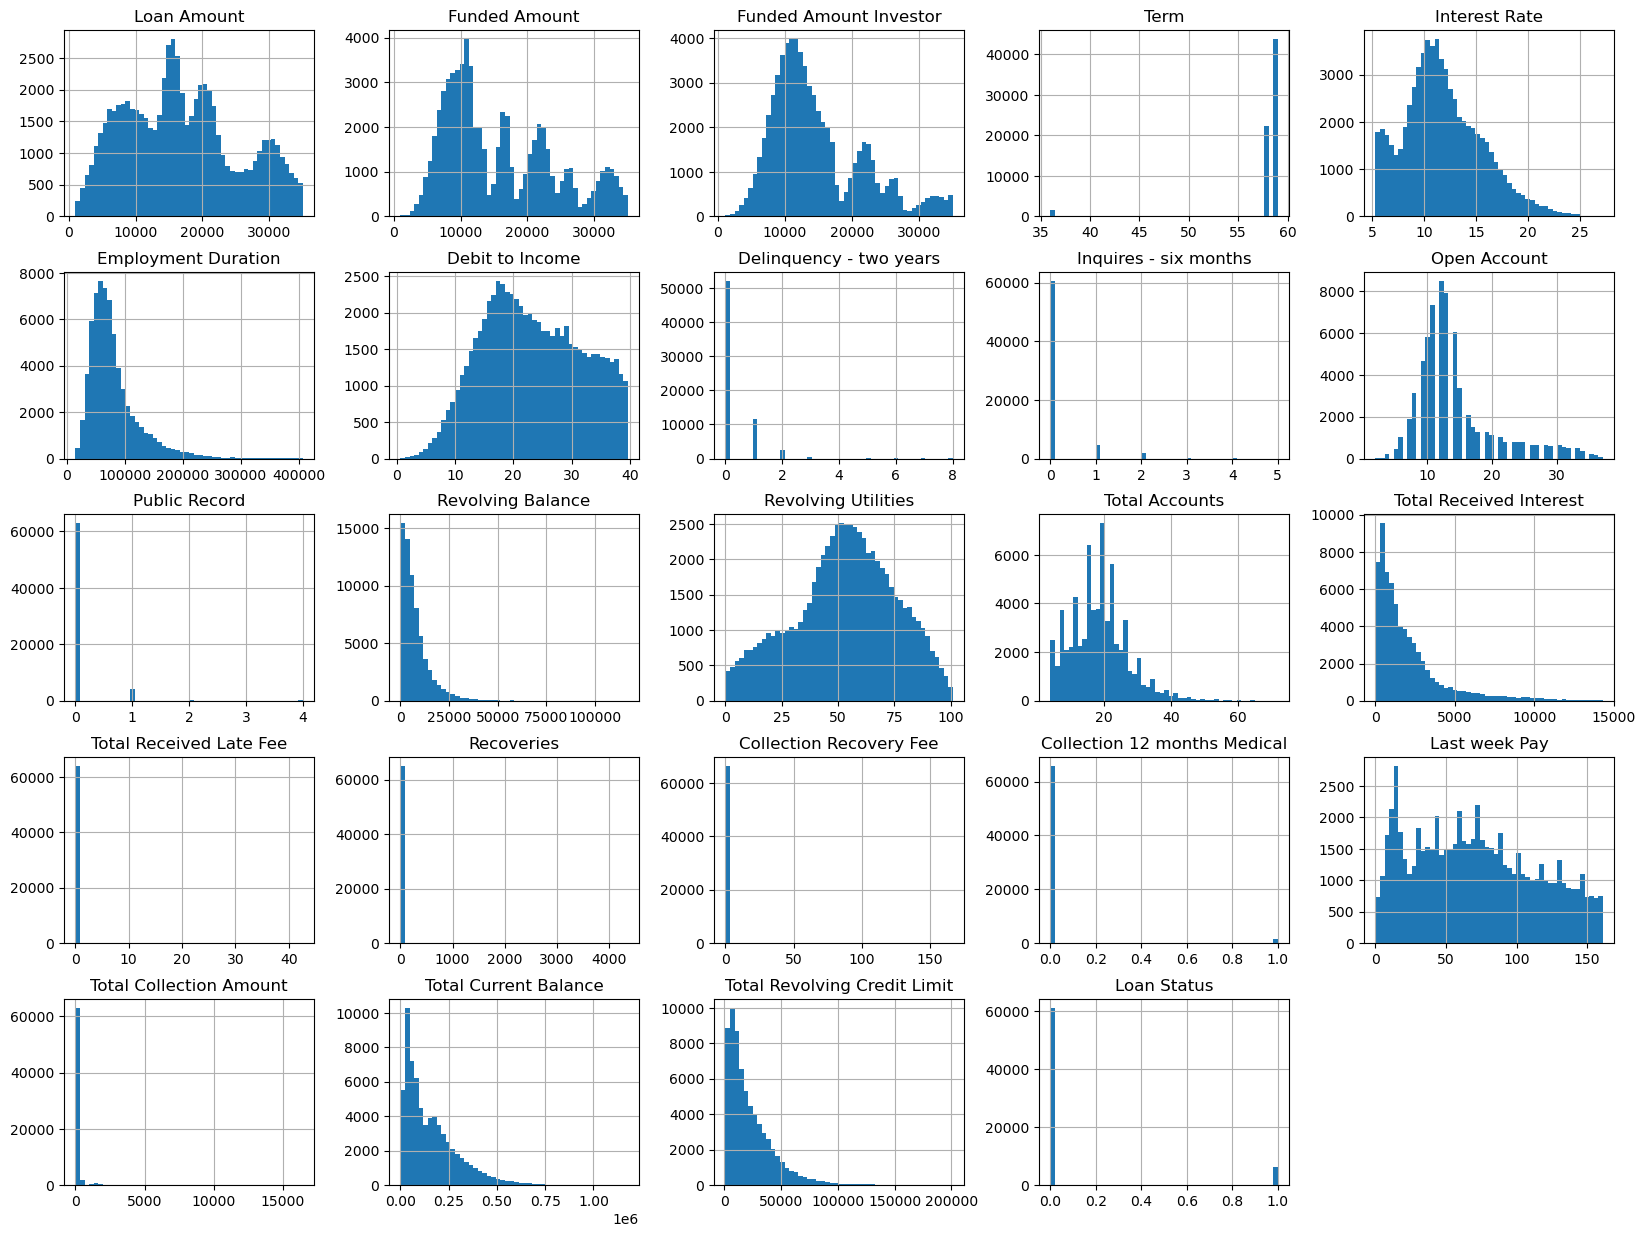

In [25]:
# checking the distribution of the variables
df.hist(bins=50,figsize=(20,15))
plt.show()

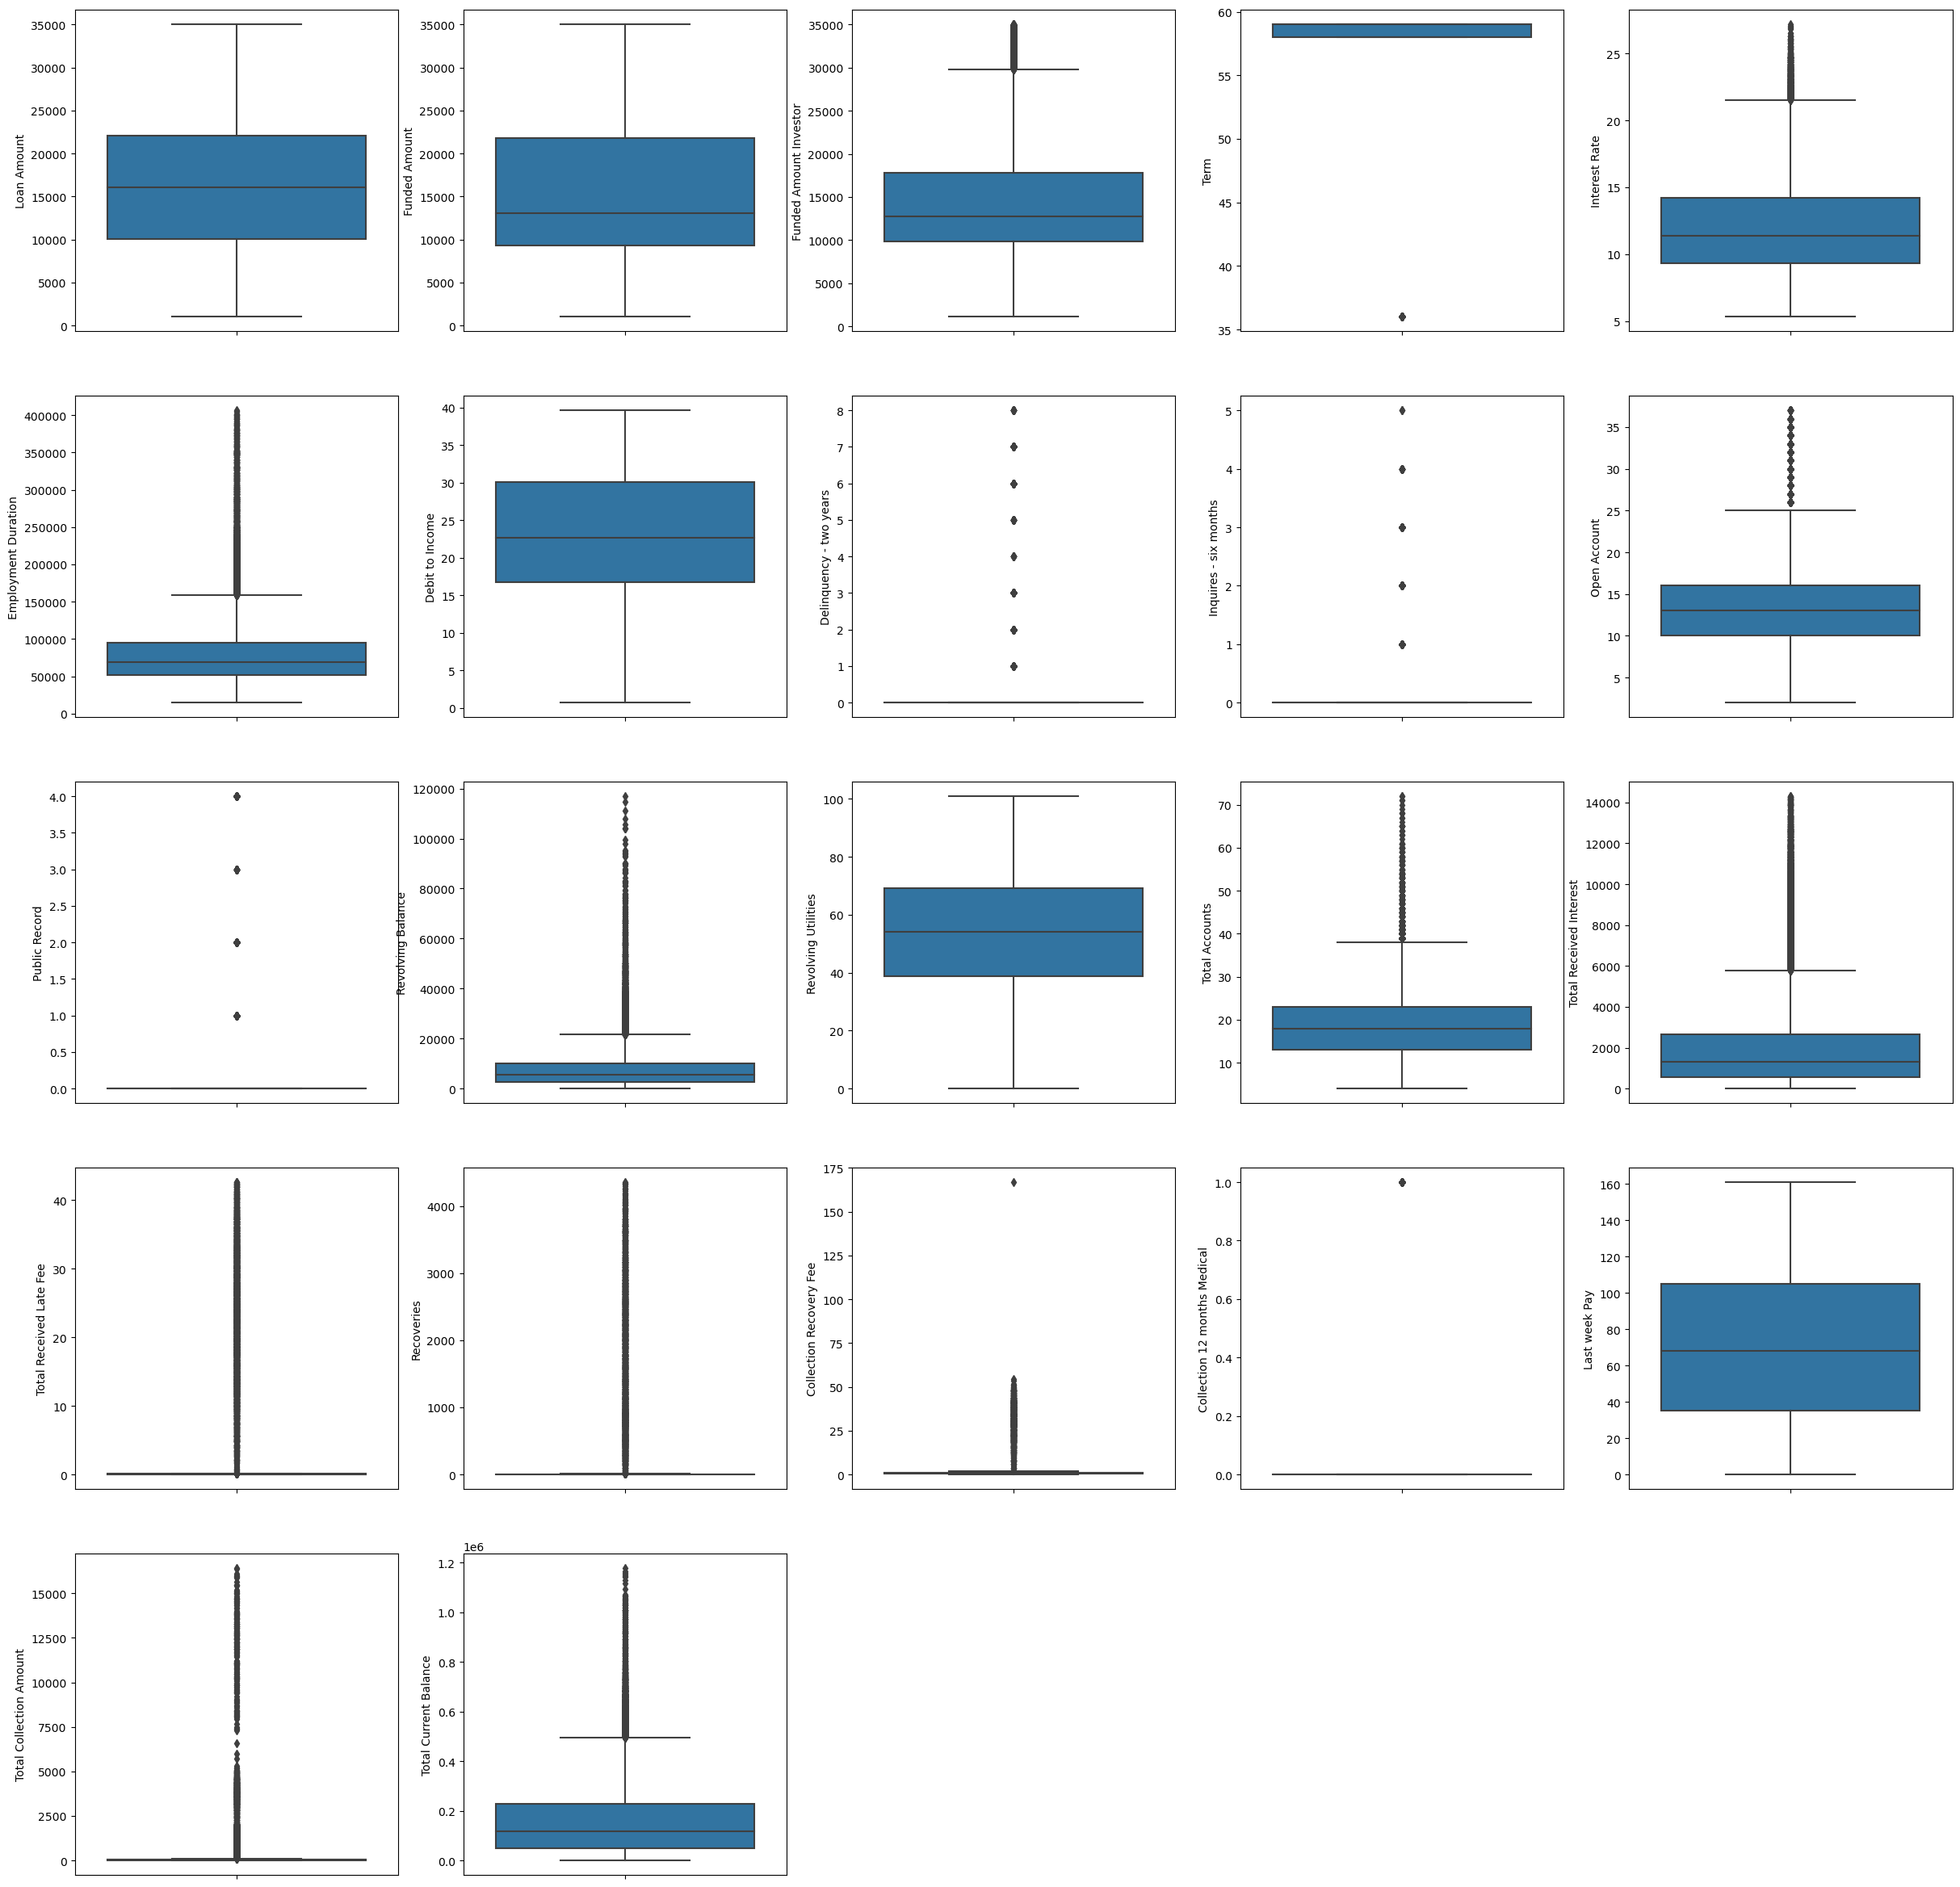

In [26]:
plt.figure(figsize=(30,30))

# Calcula o número de colunas em seu DataFrame
num_colunas = len(numericFeatures)

# Calcula o número de linhas e colunas para os subplots
num_linhas = math.ceil(math.sqrt(num_colunas))

for i in range (num_colunas-1):
    plt.subplot(num_linhas, num_linhas, i+1)
    coluna = numericFeatures[i]
    sns.boxplot(data=df, y=coluna)
    
plt.tight_layout
plt.show()

### **Análise Univariada**

In [27]:
#Atributo Objetivo: Loan Status

#Ver se os valores estão balenciados

goal = df['Loan Status']

counts = goal.value_counts()

percent = goal.value_counts(normalize=True)
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

pd.DataFrame({'Loan Status':counts, 'Percent':percent100})

Loan Status Percent
0        61222   90.7%
1         6241    9.3%

<h4><div class="alert alert-block alert-info"><b>Distribuição dos valores "Loan Status" não está equilibrada e há uma disparidade significativa entre as duas categorias:</b><br><li><b>0</b> (Não Loan Status): 90.7% dos registros.<br><li><b>1</b> (Loan Status): 9.3% dos registros.<br>Classe "Não Loan Status" é dominante no conjunto de dados, enquanto a classe "Loan Status" é menos representativa. </div>

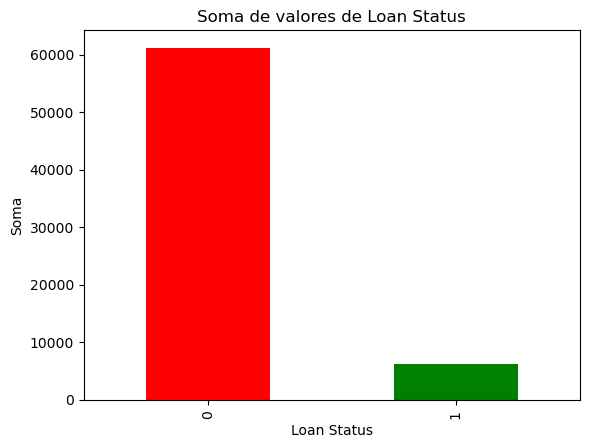

In [28]:
df['Loan Status'].value_counts().plot.bar(color=['red', 'green'])
plt.title('Soma de valores de Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Soma')
plt.show()

### **Análise Bivariada**

C:\Users\fmpvi\AppData\Local\Temp\ipykernel_39324\3075999055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

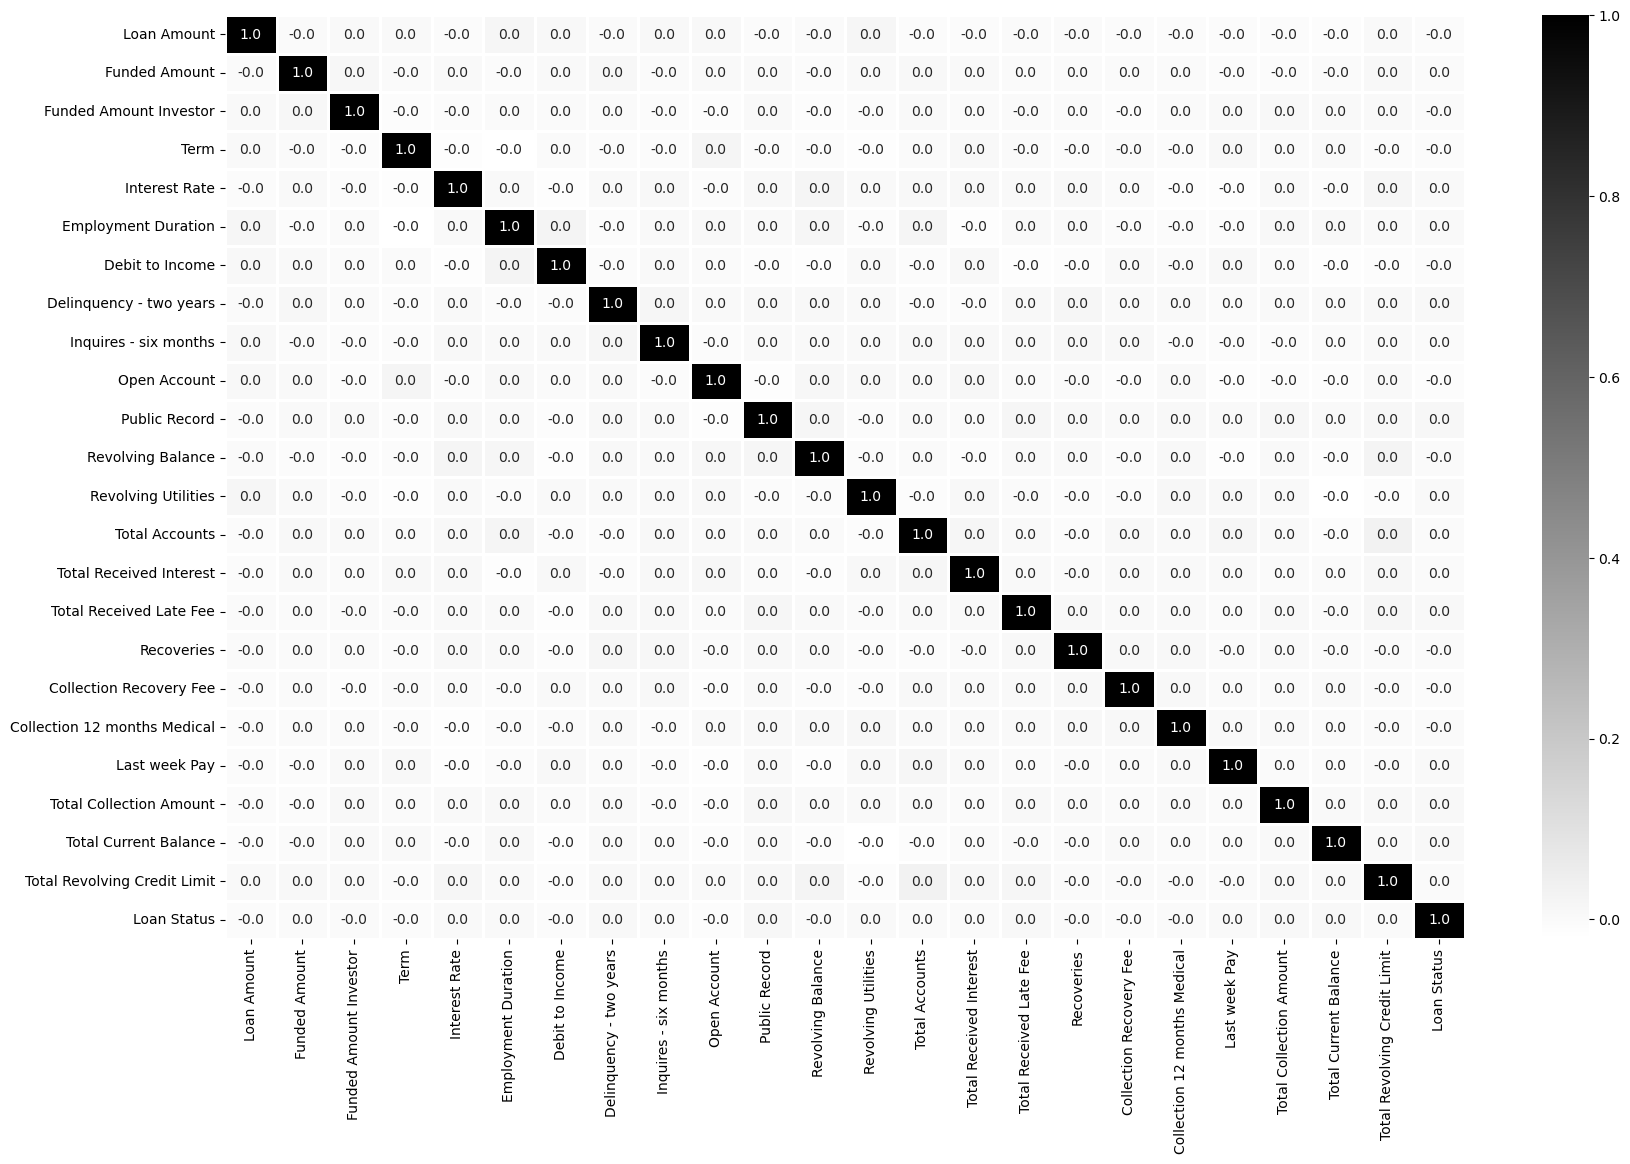

In [29]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1,fmt='.1f', cmap='gist_yarg')

<h4><div class="alert alert-block alert-info">Pelos valores visualizados, parece que não existe qualquer tipo de relação entre as <i>features</div>

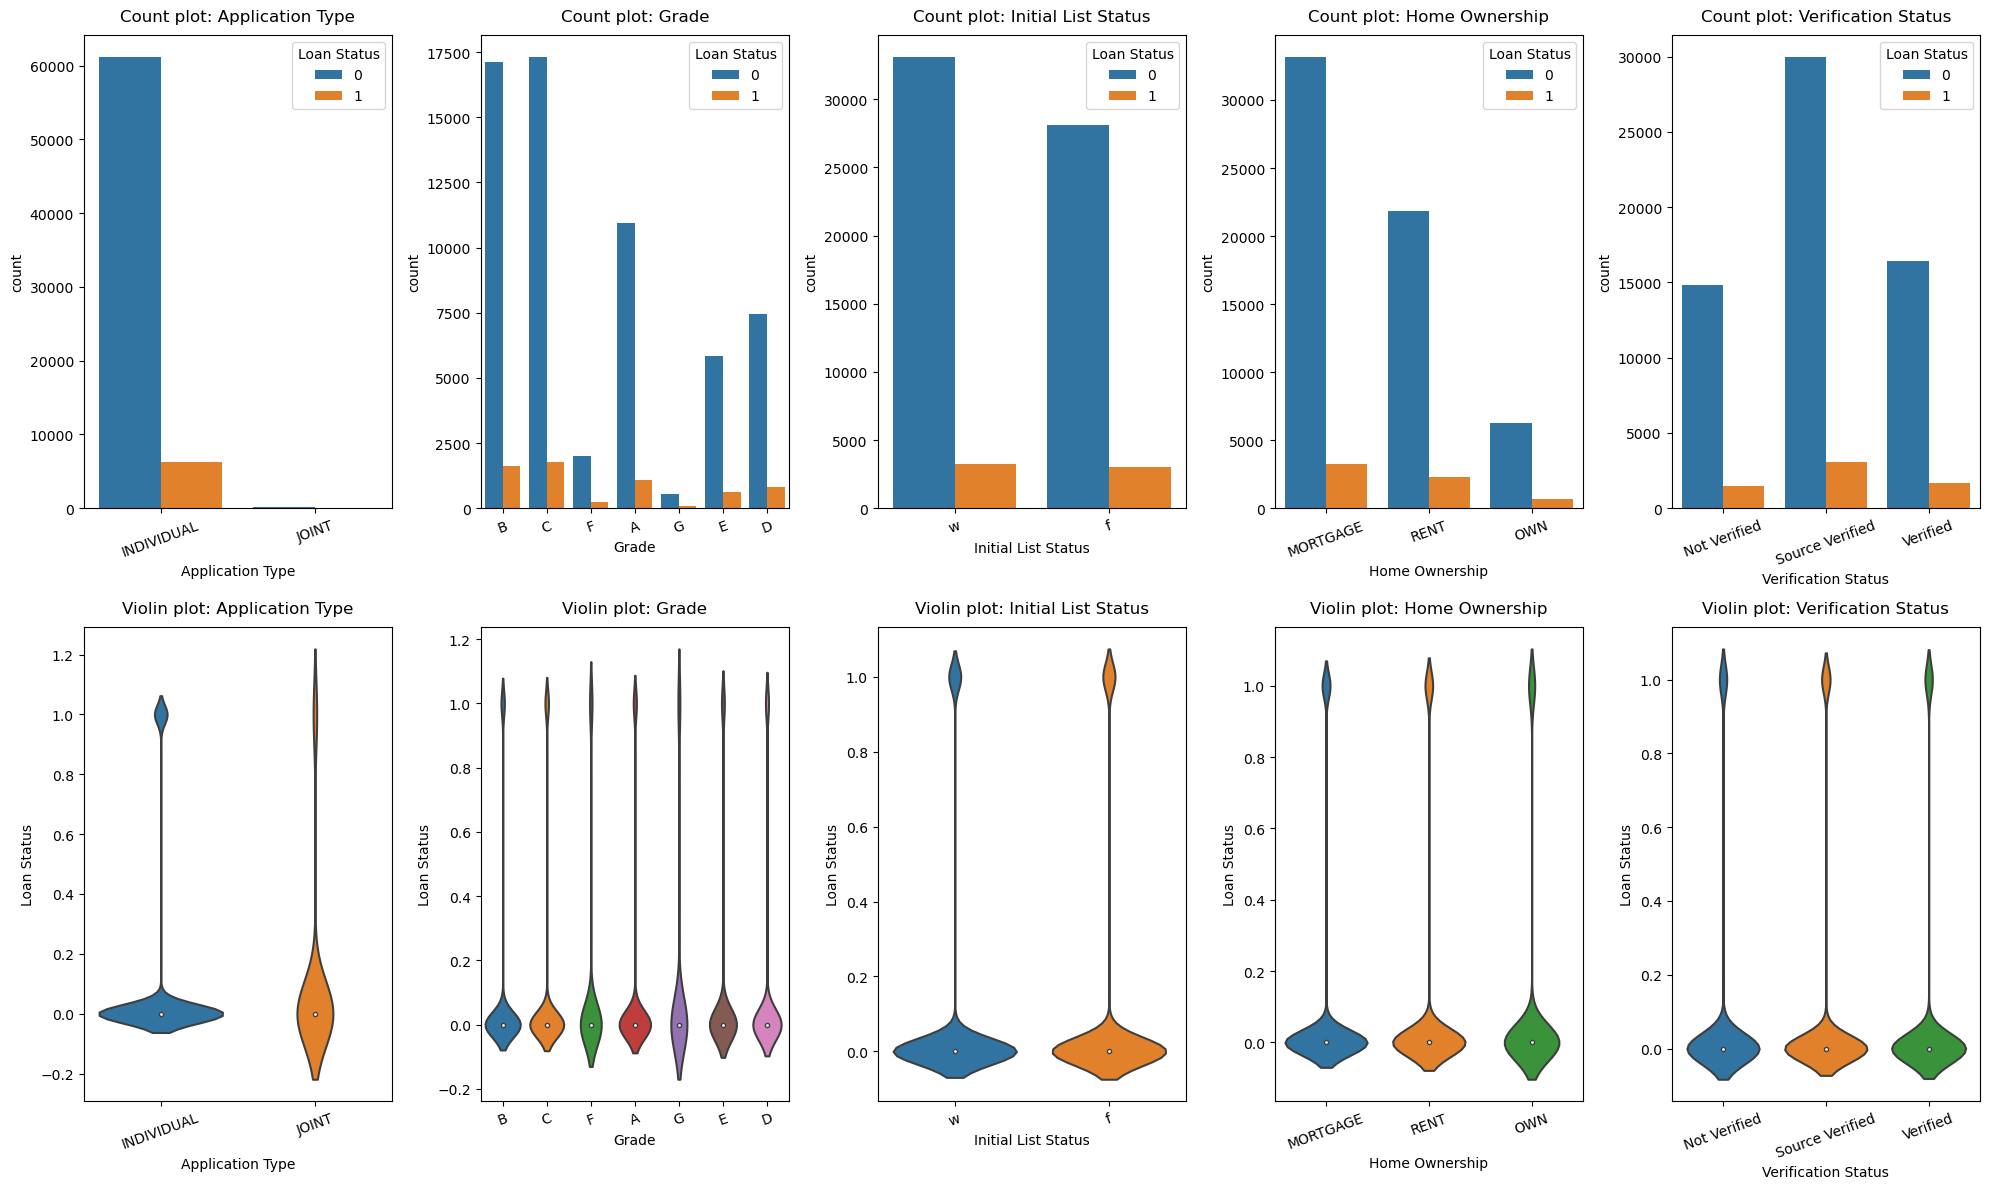

In [30]:
#Seleção das variais categoricas que queremos visualizar

CategColunas = list(df[['Application Type', 'Grade', 'Initial List Status', 'Home Ownership', 'Verification Status']])

#Set up the figure size for the entire grid of plots
plt.figure(figsize=(20, 12))

# Loop through each selected categorical column and create a subplot for the count plot
for i in range(len(CategColunas)):
    plt.subplot(2, len(CategColunas), (i+1))
    
    # Plot the count plot for "Loan Status" against the current categorical column
    sns.countplot(data=df, x=CategColunas[i], hue='Loan Status')
    plt.xticks(rotation=20)
    plt.xlabel("{}".format(CategColunas[i]))
    plt.title("Count plot: {}".format(CategColunas[i]), fontsize=12, pad=10)
    
    # Create another subplot for violin plot in the same position of the second row
    plt.subplot(2, len(CategColunas), (len(CategColunas) + (i+1)))
    
    # Plot the violin plot for "Loan Status" against the current categorical column
    sns.violinplot(data=df, x=CategColunas[i], y='Loan Status')
    plt.xticks(rotation=20)
    plt.xlabel("{}".format(CategColunas[i]))
    plt.title("Violin plot: {}".format(CategColunas[i]), fontsize=12, pad=10)


# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


#### <div class="alert alert-block alert-info"><b>É claramente visível o desiquilibrio da nossa classe alvo nos gráficos de violino (mais largos para 0 e menos largos para 1)</b><br><li><b>0</b> -> 90.7%<br><li><b>1</b> -> 9.3%</div>

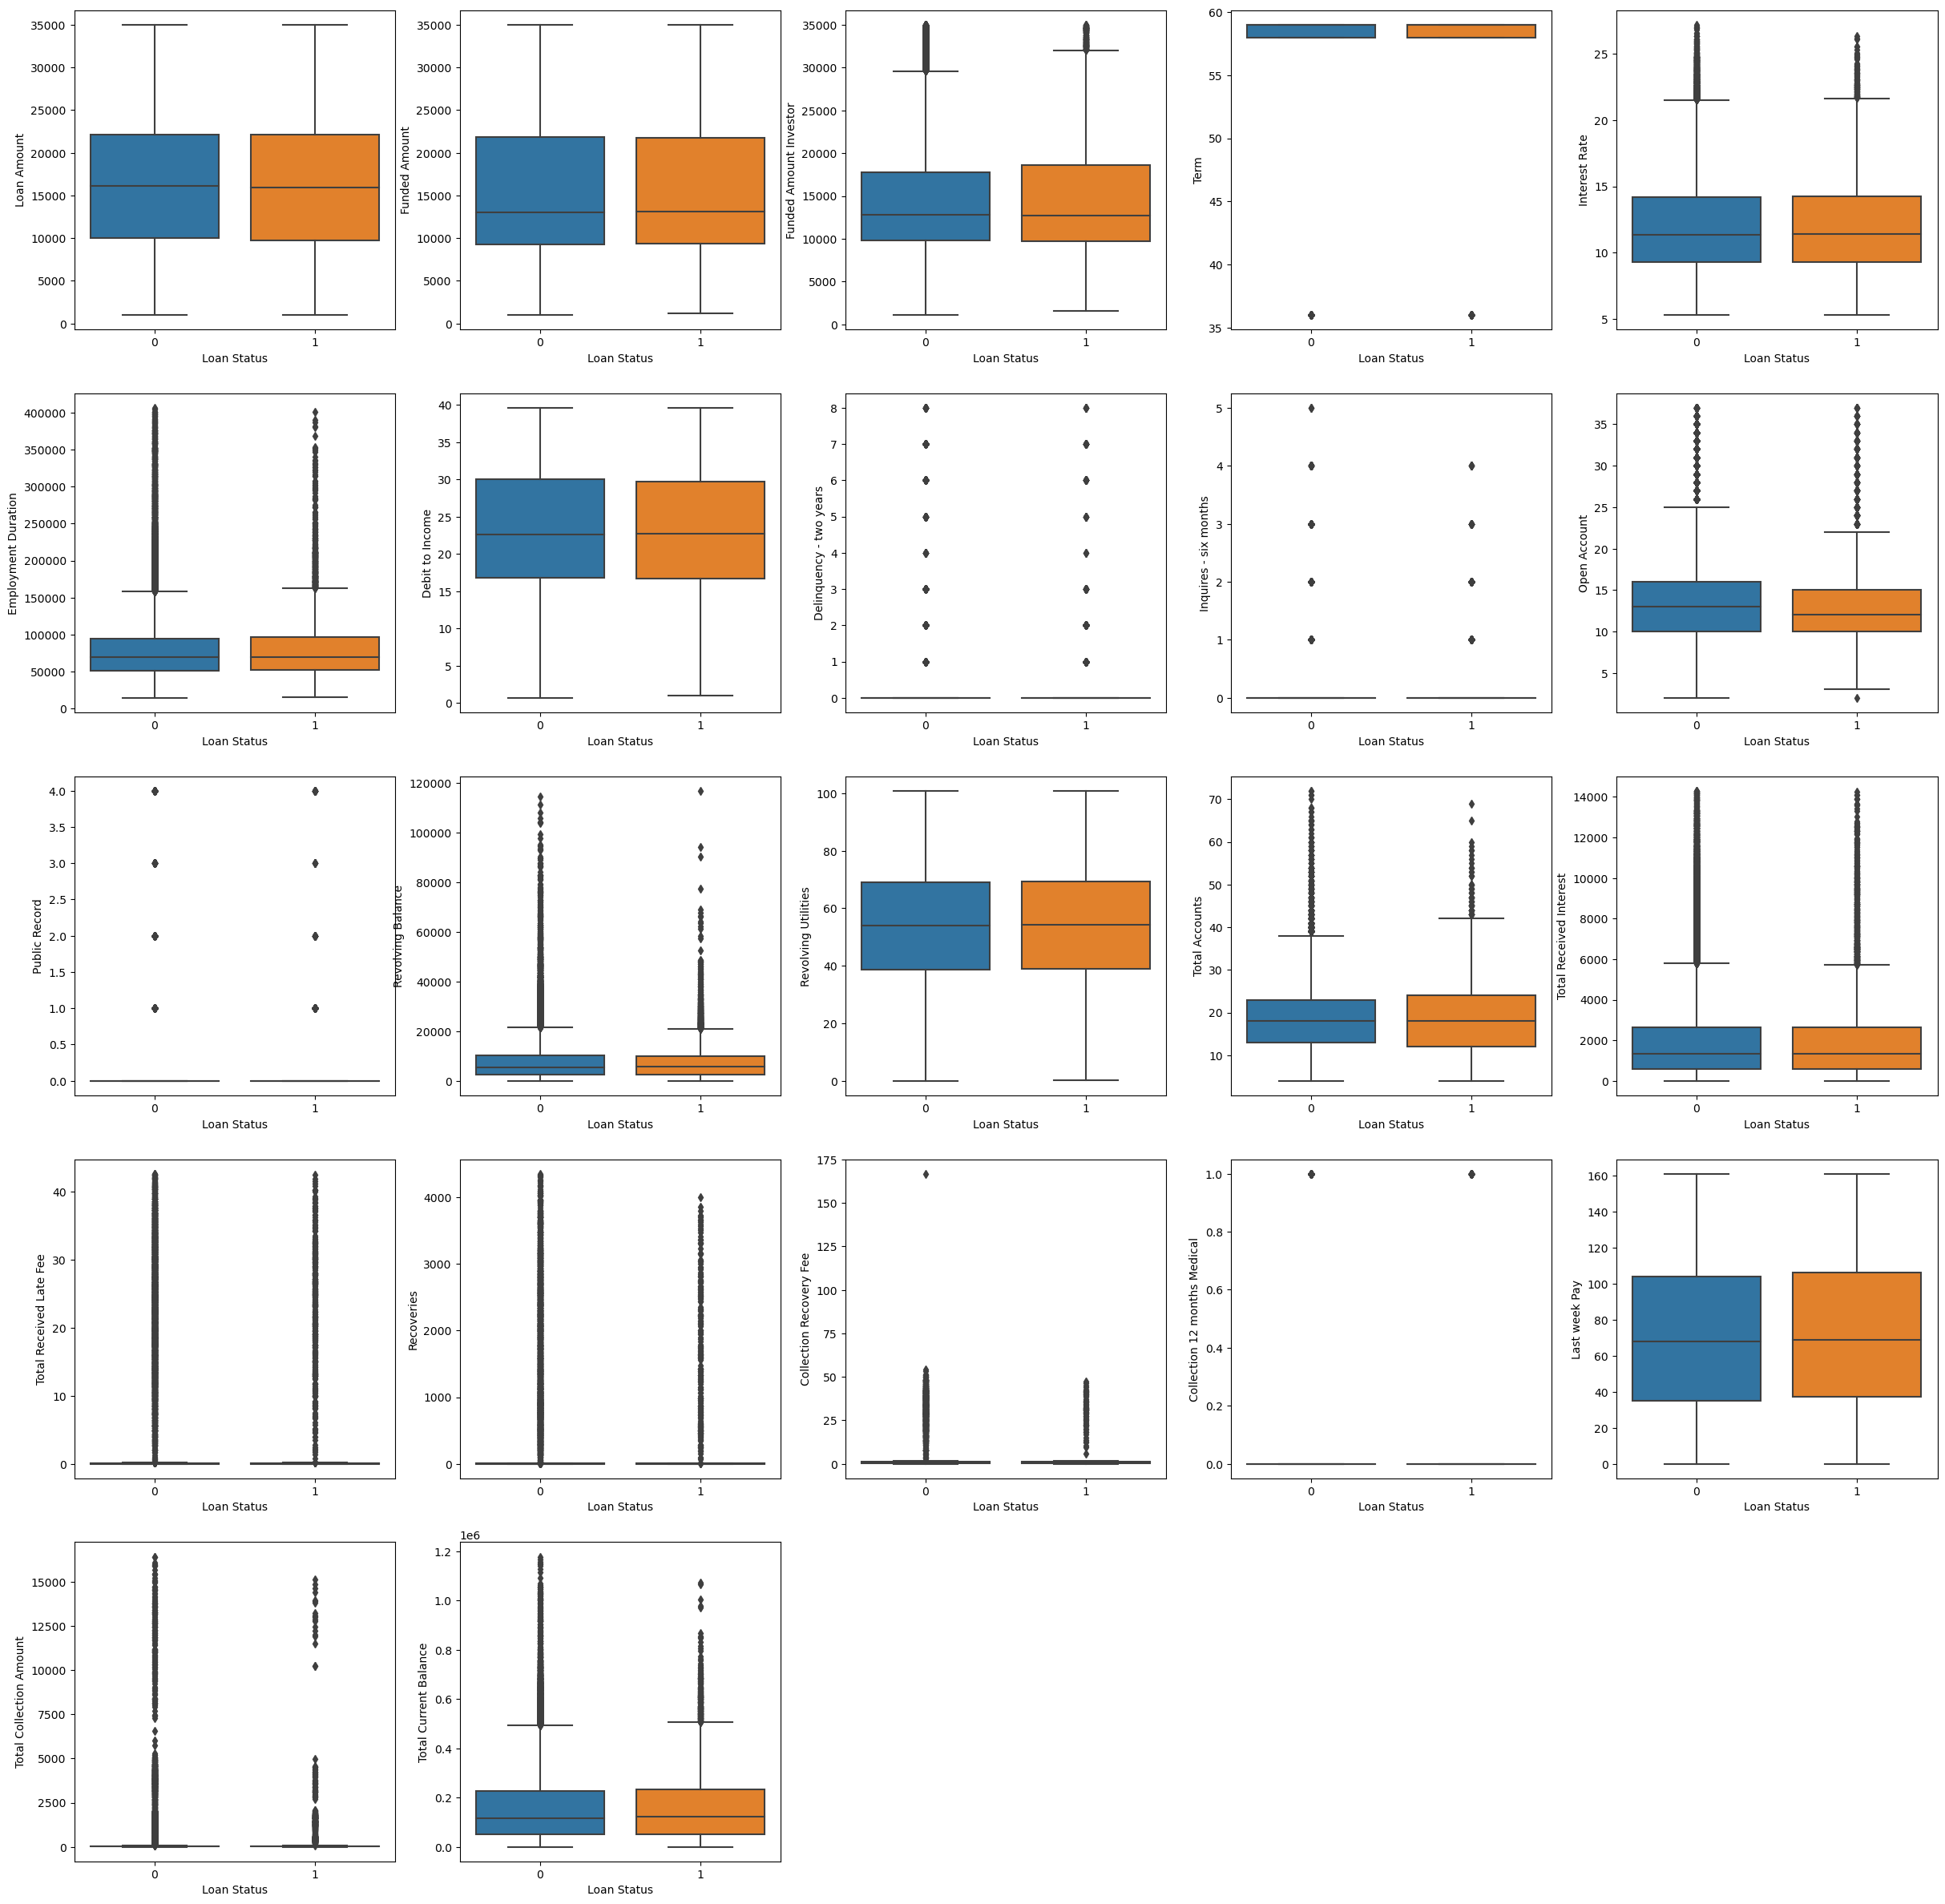

In [31]:
plt.figure(figsize=(30,30))

# Calcula o número de colunas em seu DataFrame
num_colunas = len(numericFeatures)

# Calcula o número de linhas e colunas para os subplots
num_linhas = math.ceil(math.sqrt(num_colunas))

for i in range (num_colunas-1):
    plt.subplot(num_linhas, num_linhas, i+1)
    coluna = numericFeatures[i]
    sns.boxplot(data=df, y=coluna, x=df['Loan Status'])
    
    
plt.tight_layout
plt.show()

## **Data Preparation**

### **Chi-Square Test** -> (Compara **Categórico** vs **Categórico**) 

In [32]:
#FUNÇÃO DO CHI-SQUARE TEST
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList): 
    
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors 
    SelectedPredictors=[]
    
    print('##### Chi-Square Test Results ##### \n') 
    for predictor in CategoricalVariablesList: 
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor]) 
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0 
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor) 
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
               
    return(SelectedPredictors)

In [33]:
#Guardar as variáveis relacionadas no selCateg
selCateg = FunctionChisq(inpData=df, TargetVariable='Loan Status', CategoricalVariablesList=categFeatures)

##### Chi-Square Test Results ##### 

Sub Grade is NOT correlated with Loan Status | P-Value: 0.5052675609219771
Application Type is NOT correlated with Loan Status | P-Value: 1.0
Home Ownership is correlated with Loan Status | P-Value: 0.000318849414713897
Batch Enrolled is NOT correlated with Loan Status | P-Value: 0.4555732749097418
Grade is correlated with Loan Status | P-Value: 0.029360514462449264
Initial List Status is correlated with Loan Status | P-Value: 0.0005038281525924869
Verification Status is NOT correlated with Loan Status | P-Value: 0.718690866314581
Loan Title is NOT correlated with Loan Status | P-Value: 0.05006827677464024


<h4><div class="alert alert-block alert-info">De acordo com o resultados as colunas categóricas a considerar para o uso nos modelos preditivos serão:<br><li><b>Grade</b><br><li><b>Home Ownership</b><br><li><b>Initial List Status</b><br>Sendo as restantes ignoradas.</div>

In [34]:
selCateg

['Home Ownership', 'Grade', 'Initial List Status']

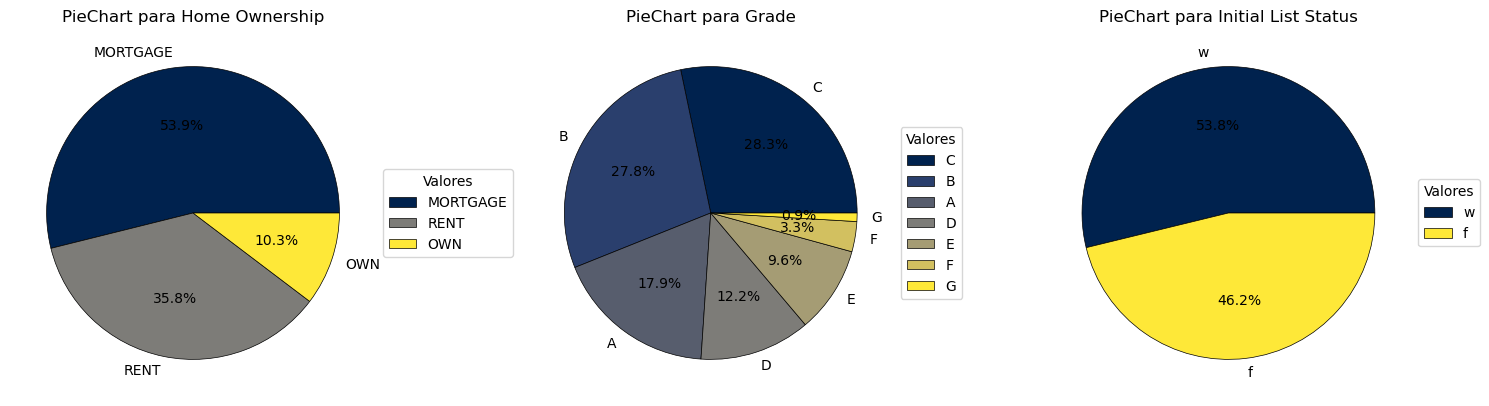

In [35]:
# Função para obter cores do cmap 'gist_yarg'
def get_gist_yarg_colors(num_colors):
    cmap = plt.get_cmap('cividis')
    return [cmap(i) for i in np.linspace(0, 1, num_colors)]

num_rows = 1
num_cols = len(selCateg)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Iterar sobre as colunas em selCateg
for idx, col in enumerate(selCateg):
    counts = df[col].value_counts()
    
    if num_cols == 1:
        ax = axes
    else:
        ax = axes[idx]
    
    # Definir cores para os setores
    num_colors = len(counts)
    colors = get_gist_yarg_colors(num_colors)
    
    # Criar o gráfico de pizza com as cores definidas e contornos
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors,
                                      wedgeprops=dict(edgecolor='black', linewidth=0.5))
    ax.set_title(f'PieChart para {col}', fontsize=12)
    
    # Adicionando legenda para os valores
    ax.legend(wedges, counts.index, title="Valores", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=10)

plt.tight_layout()
plt.show()

### **ANOVA** -> (Compara **Categórico** vs **Numérico**) 

In [36]:
#FUNÇÃO DO TESTE ANOVA
def FunctionAnova (inpData, TargetVar, PredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[] # empty list of final selected predictors
    
    print('##### ANOVA Results ##### \n') 
    for predictor in PredictorList:
        CategoryGroupLists=inpData.groupby(TargetVar)[predictor].apply(list) 
        AnovaResults = f_oneway(*CategoryGroupLists)
    
        # If the ANOVA P-Value is < 0.05, that means we reject H0 
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVar, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor) 
        else:
            print(predictor, 'is NOT correlated with', TargetVar, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [37]:
#Guardar as variáveis relacionadas no selCateg
selNumeric = FunctionAnova(inpData=df, TargetVar='Loan Status', PredictorList=numericFeatures)

##### ANOVA Results ##### 

Loan Amount is NOT correlated with Loan Status | P-Value: 0.24532743370121238
Funded Amount is NOT correlated with Loan Status | P-Value: 0.7231120961020374
Funded Amount Investor is NOT correlated with Loan Status | P-Value: 0.9811486184162733
Term is NOT correlated with Loan Status | P-Value: 0.37582542132472074
Interest Rate is NOT correlated with Loan Status | P-Value: 0.4513394637979872
Employment Duration is NOT correlated with Loan Status | P-Value: 0.3344917102292555
Debit to Income is NOT correlated with Loan Status | P-Value: 0.42714577391898256
Delinquency - two years is correlated with Loan Status | P-Value: 0.009462634922992178
Inquires - six months is NOT correlated with Loan Status | P-Value: 0.8806176446325595
Open Account is NOT correlated with Loan Status | P-Value: 0.06620701987720404
Public Record is correlated with Loan Status | P-Value: 0.005946386493849328
Revolving Balance is NOT correlated with Loan Status | P-Value: 0.78043535653288

<h4><div class="alert alert-block alert-info">De acordo com o resultados as colunas numéricas a considerar para o uso nos modelos preditivos serão:<br><li><b>Delinquency - two years</b><br><li><b>Public Record</b><br><li><b>Total Received Late Fee</b><br><li><b>TTotal Current Balance</b><br><li><b>Total Collection Amount</b><br>Sendo as restantes ignoradas.</div>

In [38]:
selNumeric

['Delinquency - two years',
 'Public Record',
 'Total Received Late Fee',
 'Total Collection Amount',
 'Total Current Balance']

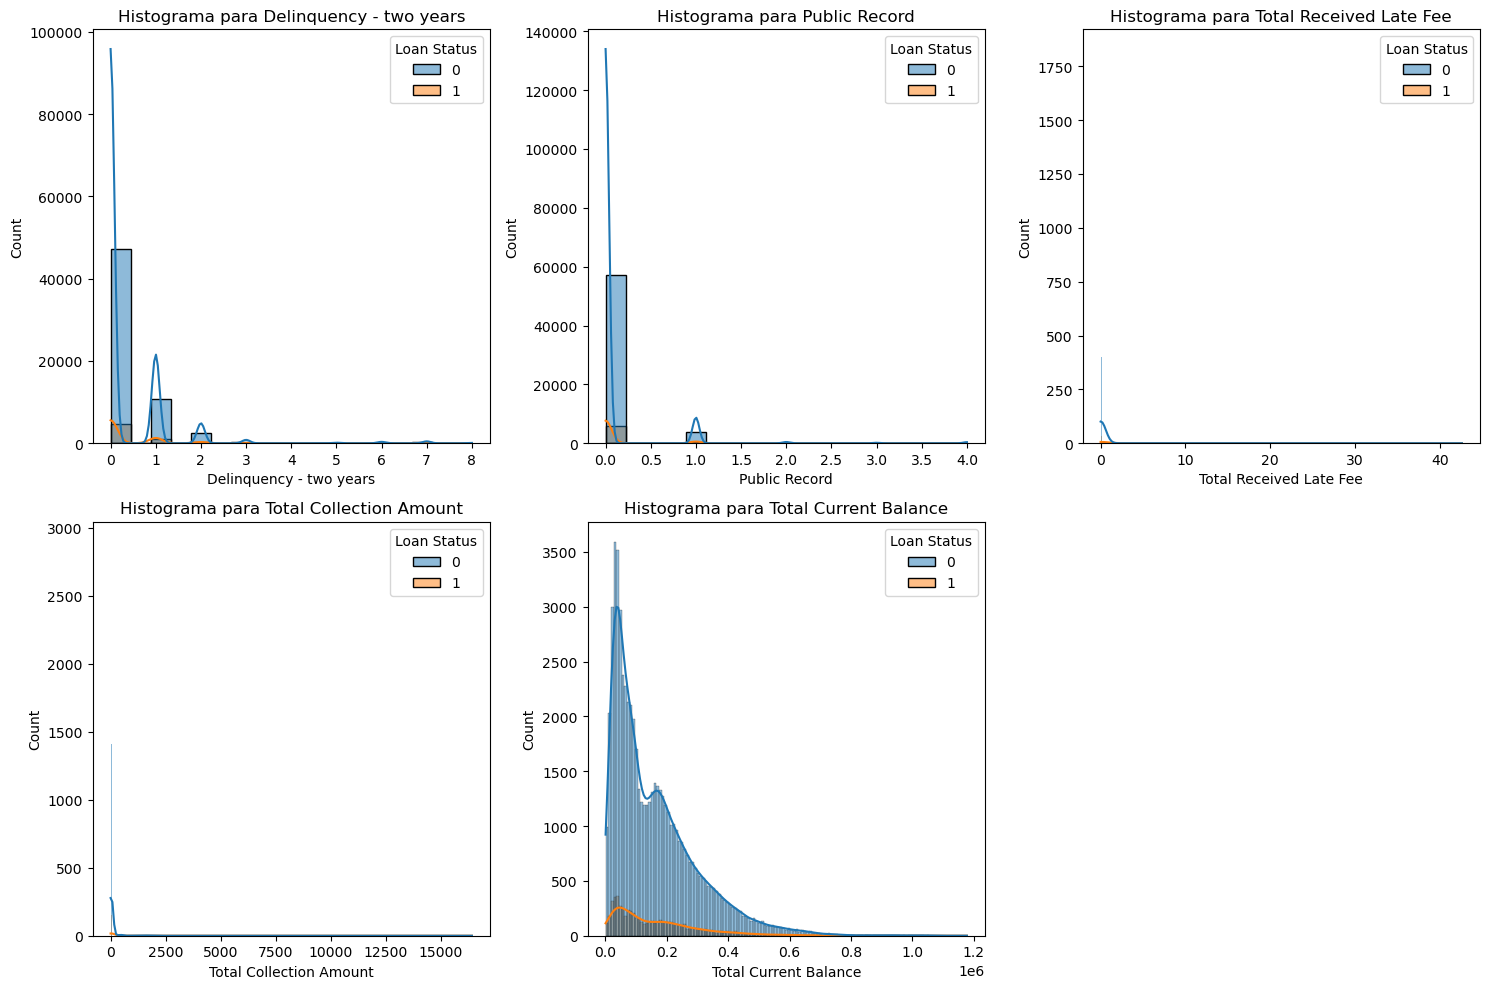

In [39]:
num_plots = len(selNumeric)
num_cols = 3
num_rows = -(-num_plots // num_cols)  # Calcula o número de linhas arredondando para cima

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Criando subplots

# Flatten the axes array if needed
axes = axes.flatten()

# Vamos iterar sobre os nomes das colunas em selNumeric
for idx, col in enumerate(selNumeric):
    sns.histplot(data=df, x=col, hue='Loan Status', kde=True, ax=axes[idx])  # Usando o eixo correspondente
    
    axes[idx].set_title(f'Histograma para {col}')  # Título do subplot com o nome da coluna

# Oculta subplots não utilizados
for i in range(num_plots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

<h4><div class="alert alert-block alert-info">Depois de selecionarmos a colunas relevantes e visualizarmos os dados comparativamente à nossa classe alvo, vamos agora criar o Dataframe a ser usado nos modelos preditivos com base nestas colunas</div>

In [40]:
colunasSelecionadas = selCateg + selNumeric # + [goalAttrib]
dfML = df[colunasSelecionadas]
dfML.head()

Home Ownership Grade Initial List Status  Delinquency - two years  \
0       MORTGAGE     B                   w                        1   
1           RENT     C                   f                        0   
2       MORTGAGE     F                   w                        0   
3       MORTGAGE     C                   w                        1   
4       MORTGAGE     C                   w                        1   

   Public Record  Total Received Late Fee  Total Collection Amount  \
0              0                 0.102055                       31   
1              0                 0.036181                       53   
2              0                18.778660                       34   
3              0                 0.044131                       40   
4              1                19.306646                      430   

   Total Current Balance  
0                 311301  
1                 182610  
2                  89801  
3                   9189  
4                 126029

## **Modelos Preditivos**

### **K-nearest-Neighbours**

<h4>A previsão de um valor (discreto/contínuo) é feita com base nos valores mais próximos.É baseada em dois conceitos fundamentais <li><b>Função de distância</b> - mede a distância entre dois registos
<li><b>Função de combinação</b> - combina os resultados a partir dos vizinhos</b><br>A distância entre dois pontos xi e yi é normalmente calculada usando a
distância euclidiana<br>Os atributos devem ser normalizados</h4>

In [41]:
#Treating all the nominal variables at once with dummy variables 
dfML = pd.get_dummies(dfML, drop_first=True)
dfML['Loan Status'] = df['Loan Status']
dfML.head()
# dfML['Loan Status'].value_counts(normalize=True) * 100


Delinquency - two years  Public Record  Total Received Late Fee  \
0                        1              0                 0.102055   
1                        0              0                 0.036181   
2                        0              0                18.778660   
3                        1              0                 0.044131   
4                        1              1                19.306646   

   Total Collection Amount  Total Current Balance  Home Ownership_OWN  \
0                       31                 311301                   0   
1                       53                 182610                   0   
2                       34                  89801                   0   
3                       40                   9189                   0   
4                      430                 126029                   0   

   Home Ownership_RENT  Grade_B  Grade_C  Grade_D  Grade_E  Grade_F  Grade_G  \
0                    0        1        0        0        0        0        0   
1                    1        0        1        0        0        0        0   
2                    0        0        0        0        0        1        0   
3                    0        0        1        0        0        0        0   
4                    0        0        1        0        0        0        0   

   Initial List Status_w  Loan Status  
0                      1            0  
1                      0            0  
2                      1            0  
3                      1            0  
4                      1            0

<h5><div class="alert alert-block alert-info">Dada a natureza do algoritmo, temos que fazer certas alterações aos dados<li>Usar get_dummies() nas variáveis categóricas<li>Normalizar os dados</div></h5>

In [42]:
dfML.info() #Agora temos tudo a numérico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delinquency - two years  67463 non-null  int64  
 1   Public Record            67463 non-null  int64  
 2   Total Received Late Fee  67463 non-null  float64
 3   Total Collection Amount  67463 non-null  int64  
 4   Total Current Balance    67463 non-null  int64  
 5   Home Ownership_OWN       67463 non-null  uint8  
 6   Home Ownership_RENT      67463 non-null  uint8  
 7   Grade_B                  67463 non-null  uint8  
 8   Grade_C                  67463 non-null  uint8  
 9   Grade_D                  67463 non-null  uint8  
 10  Grade_E                  67463 non-null  uint8  
 11  Grade_F                  67463 non-null  uint8  
 12  Grade_G                  67463 non-null  uint8  
 13  Initial List Status_w    67463 non-null  uint8  
 14  Loan Status           

#### **Stratified Holdout**

In [43]:
X = dfML.iloc[:,:-1] #All Features, except last 
y = dfML['Loan Status'] # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)#20% para teste 80% para treino, stratify para manter a proporção da varivel avo no teste e no treino

print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

#Verify condition in train and test
print("\nTrain condition distribution:\n", y_train.value_counts(normalize=True))
print("\nTrain condition distribution:\n", y_test.value_counts(normalize=True))

Train size:  (53970, 14)
Test size:  (13493, 14)

Train condition distribution:
 0    0.907486
1    0.092514
Name: Loan Status, dtype: float64

Train condition distribution:
 0    0.907508
1    0.092492
Name: Loan Status, dtype: float64


#### **Normalização dos dados**

In [44]:
#StandardScaler transforms data so each feature 
#have zero_mean and unit standard-deviation

stdScaler = StandardScaler()
Xstd_train = stdScaler.fit_transform(X_train)
Xstd_test = stdScaler.fit_transform(X_test)

print("Normalized Train Data", Xstd_train)
print("Normalized Test Data", Xstd_test)

Normalized Train Data [[-0.40762844  2.65606863  1.64261378 ... -0.18585545 -0.09786528
   0.92968441]
 [-0.40762844 -0.23599496 -0.204617   ... -0.18585545 -0.09786528
  -1.07563383]
 [-0.40762844 -0.23599496 -0.13264498 ... -0.18585545 -0.09786528
   0.92968441]
 ...
 [ 0.84349229 -0.23599496 -0.19772064 ... -0.18585545 -0.09786528
  -1.07563383]
 [-0.40762844 -0.23599496 -0.20864201 ... -0.18585545 -0.09786528
  -1.07563383]
 [-0.40762844 -0.23599496 -0.20453737 ... -0.18585545 -0.09786528
  -1.07563383]]
Normalized Test Data [[-0.41177422 -0.23087356 -0.21041216 ... -0.18446028 -0.09392779
   0.91421131]
 [-0.41177422  2.62708689 -0.21753559 ... -0.18446028 -0.09392779
  -1.09383902]
 [-0.41177422 -0.23087356 -0.20962837 ... -0.18446028 -0.09392779
   0.91421131]
 ...
 [-0.41177422 -0.23087356 -0.20313704 ... -0.18446028 -0.09392779
  -1.09383902]
 [-0.41177422 -0.23087356 -0.21609167 ... -0.18446028 -0.09392779
  -1.09383902]
 [-0.41177422 -0.23087356 -0.2169885  ... -0.18446028 -

In [45]:
#KNeighborsClassifier dafault values: n_neighbors=5, metric='mink'

clf = KNeighborsClassifier() #default = 5

#Creating teh model on training data
knn = clf.fit(Xstd_train, y_train) #Usa conjunto de treino para 
y_pred = knn.predict(Xstd_test)

#### **Avaliação do modelo**

[[    5  1243]
 [   83 12162]]


              precision    recall  f1-score   support

           1       0.06      0.00      0.01      1248
           0       0.91      0.99      0.95     12245

    accuracy                           0.90     13493
   macro avg       0.48      0.50      0.48     13493
weighted avg       0.83      0.90      0.86     13493



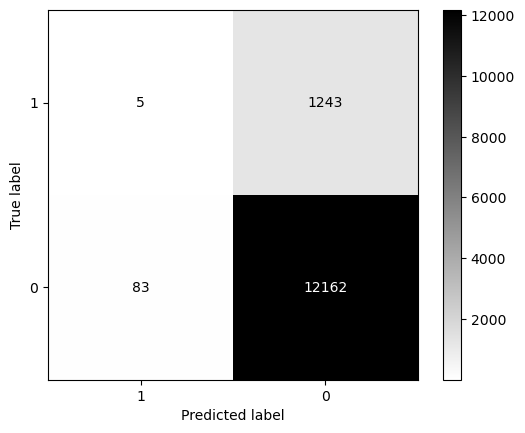

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

<h5><div class="alert alert-block alert-danger">Loan Status: 1 = Defaulter (falha pagamento), 0 = Non Defaulters</br>
Pior caso é o <b>Falso Negativo</b>, que são aqueles que o modelo prevê como Non Defaulters, mas que realmente são Defaulters causando prejuizos.</div>

#### **Matriz de Confusão:**

|                    | Defaulter (Previsto) | Non-Defaulter (Previsto) |
|--------------------|-----------------------|---------------------------|
| Defaulter (Real)   | VP(5)                     | FN(1243)                      |
| Non-Defaulter (Real)| FP(83)                    | VN(12162)                     |

##### **Interpretação dos valores da matriz de confusão com base no contexto:**

- **Verdadeiros positivos (VP):** 5 - Os casos em que o modelo previu corretamente os clientes que falhariam no pagamento (Defaulter).
- **Falsos negativos (FN):** 1243 - Indica quantos casos de falha de pagamento o modelo não conseguiu identificar corretamente.
- **Falsos positivos (FP):** 83 - Número de casos classificados como falha de pagamento (Defaulter), mas que na verdade não eram.
- **Verdadeiros negativos (VN):** 12162 - Os casos em que o modelo previu corretamente os clientes que não falhariam no pagamento (Non-Defaulter).



<h5><div class="alert alert-block alert-info">Sendo que os <b>Falsos Negativos</b> são o valores que devemos ter mais atenção, a medida de desempenho <b>Recall</b> é aquela que devemos observar.</br>
Com base nos resultados este modelo é <b>péssimo</b>, muito provavelmente por causa do desiquilibrio da classe.
</div>

#### **Vamos determinar o melhor valor de K para o modelo com o crossvalidation**

#### O codigo seguinte estará comentado, uma vez que server para identifica ro valor de K e é computacionalmente exigente, os resultados estarão em Mardown depois do código

In [47]:
# #Chosing the best K value using K-fold cross validation
 
# kvalues = []
# cv_recall = []
# cv_scores = []
 
# #K from 1...151 odd numbers #151 iterações com
# for i in range(1, 15, 2): # de 2 em 2
#     kvalues.append(i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     #crossValidation
#     cv_recall = cross_val_score(knn, Xstd_train, y_train, scoring = 'recall', cv = 5) #recall pois como vimos acima é este que queremos otimizar
#     cv_scores.append(np.mean(cv_recall))
   
#     #knn = algoritmo; Xstd_train => conjunto de treino normalizado; y_train => conjunto de treino; scoring = 'recall' => queremos que concentre no recall; cv = 5 => cross validation com 5 folds
# results = pd.DataFrame({'K': kvalues, 'recall': cv_scores})

In [48]:
# results

### Resultados:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>K</th>
      <th>recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0.105347</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>0.027237</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>0.008011</td>
    </tr>
    <tr>
      <th>3</th>
      <td>7</td>
      <td>0.000801</td>
    </tr>
    <tr>
      <th>4</th>
      <td>9</td>
      <td>0.000401</td>
    </tr>
    <tr>
      <th>5</th>
      <td>11</td>
      <td>0.000200</td>
    </tr>
    <tr>
      <th>6</th>
      <td>13</td>
      <td>0.000000</td>
    </tr>
  </tbody>
</table>
</div>



              precision    recall  f1-score   support

           1       0.11      0.11      0.11      1248
           0       0.91      0.90      0.91     12245

    accuracy                           0.83     13493
   macro avg       0.51      0.51      0.51     13493
weighted avg       0.83      0.83      0.83     13493



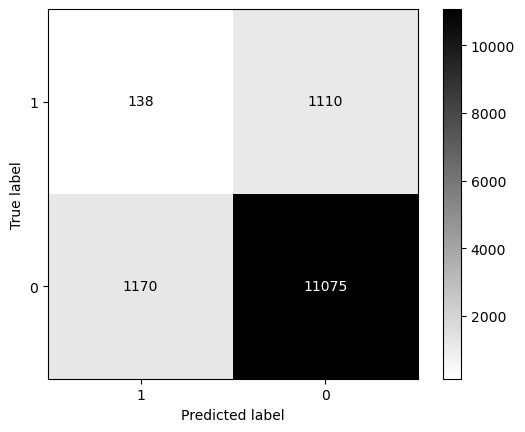

In [49]:
#KNeighborsClassifier dafault values: n_neighbors=5, metric='mink'

clf = KNeighborsClassifier(n_neighbors=1) #default = 5

#Creating teh model on training data
knn = clf.fit(Xstd_train, y_train) #Usa conjunto de treino para 
y_pred = knn.predict(Xstd_test)

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

<h4>Apesar da pequena melhoria, ainda está muito fraco, com <b>recall = 0.11

### **Naive Bayes**

NBayes, recall: 0.094331


              precision    recall  f1-score   support

           1       0.08      0.01      0.01      1248
           0       0.91      0.99      0.95     12245

    accuracy                           0.90     13493
   macro avg       0.49      0.50      0.48     13493
weighted avg       0.83      0.90      0.86     13493



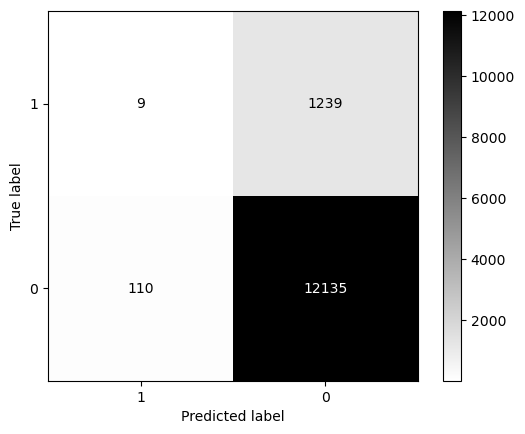

In [50]:
# Cria e treina usando a classificação Naive Bayes
nb = GaussianNB()
#Para este algiritmo não precisamos de normalizar os dados
nb.fit(X_train, y_train)

# Faz previsoes no dataset
y_pred = nb.predict(X_test)

cv_results = cross_val_score(clf, X_train, y_train, scoring='recall', cv=5)

print("%s: %f" % ("NBayes, recall", cv_results.mean()))

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

### **Regressão Logística**

Regressão Logística, recall: 0.000000


              precision    recall  f1-score   support

           1       1.00      0.00      0.00      1248
           0       0.91      1.00      0.95     12245

    accuracy                           0.91     13493
   macro avg       0.95      0.50      0.48     13493
weighted avg       0.92      0.91      0.86     13493



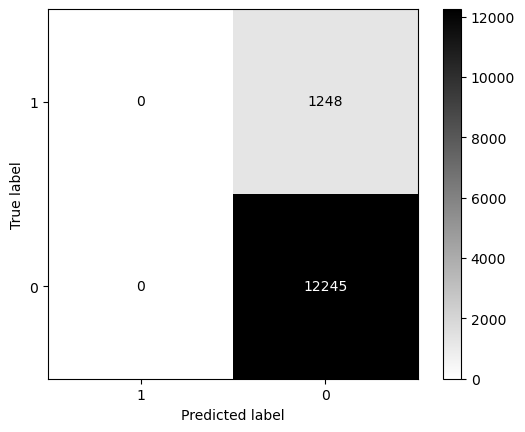

In [51]:
model = LogisticRegression(max_iter=1000) # uso do max_iter=1000 para atingir convergencia, aumenta o tempo de treino e recusos computacionais

# Treino do modelo com os dados de treinamento
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')

print("%s: %f" % ("Regressão Logística, recall", scores.mean()))

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0], zero_division=1))

### **Random Forest**



              precision    recall  f1-score   support

           1       0.12      0.00      0.00      1248
           0       0.91      1.00      0.95     12245

    accuracy                           0.91     13493
   macro avg       0.52      0.50      0.48     13493
weighted avg       0.84      0.91      0.86     13493



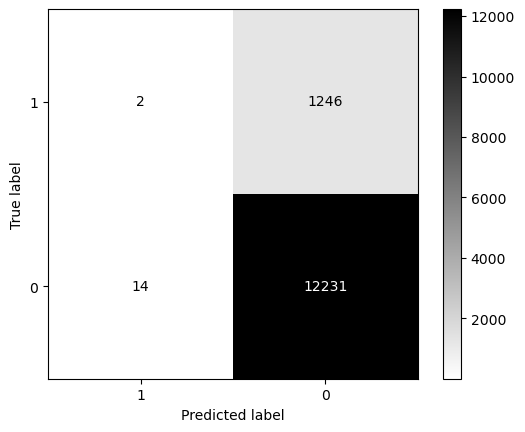

In [52]:
RndForest=RandomForestClassifier()
RndForest.fit(X_train,y_train)
y_pred=RndForest.predict(X_test)

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

 ---

## **Para todos os modelos realizados, os resultados foram muito fracos!!**

### Apesar dos bons resultados de accuracy dos modelos, este resultado é enganador, uma vez que a medida mais importante para este caso é o recall.
### Péssimos resultados de recall (revocação) podem surgir por várias razões em problemas de classificação de defaulters de empréstimos bancários. Aqui estão algumas possíveis razões:
- **Desiquilibrio da Classe:** Os modelos podem ter dificuldade em aprender padrões eficientes para a classe minoritária, logo vamos equilibrar as classes com o SMOTE() ou outra técnica de equilibrio de classes
- **Features Insuficientes ou Informativas:** Pode ser necessário rever ou incluir mais features relevantes para melhorar a capacidade preditiva do modelo.
- **Hiperparâmetros Mal Ajustados:** O ajuste dos hiperparametros do modelos preditivos utilizados podem ajudar na melhoria dos resultados dos mesmos.
- **Pré-processamento inadequado:** É preciso rever como foi feita o tratamento dos dados, uma vez que a preparação inadequada dos dados pode afetar drasticamente o desempenho do modelo.

# **Equilibrio das classes**

## Existem 3 maneiras de equilibrar o Dataset:
1. **Oversampling da classe minoritária:** Gera exemplos sintéticos da classe minoritária para igualar a proporção das classes. Pode criar Overfitting!
2. **Undersampling da classe majoritária:** Remove aleatoriamente exemplos da classe majoritária para igualar a proporção das classes. Podemos perder informação importante!
3. **Combinação de oversampling e undersampling:** Combina a geração sintética de exemplos com a remoção de exemplos da classe majoritária. Meio termo.

Vamos usar a 3ªopção.

In [53]:
undersampler = RandomUnderSampler(random_state=42)
X_train_undersample, y_train_balanced_undersample = undersampler.fit_resample(X_train, y_train)

smote_tomek = SMOTETomek(random_state=42)
# Aplicar SMOTE apenas no conjunto de treino
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

In [54]:
# from imblearn.over_sampling import SMOTE
# # Aplicar SMOTE apenas no conjunto de treino
# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(pd.DataFrame({'Values': unique,'percent': counts/sum(counts)}))


Class distribution after oversampling:
   Values  percent
0       0      0.5
1       1      0.5


In [56]:
X_train.shape[0]

53970

## Vamos agora testar novamente os modelos depois do equilibrio dos valores de teste do modelo

### **Regressão Logística**

LogisticRegression(C=0.001, max_iter=1000)


              precision    recall  f1-score   support

           1       0.09      0.94      0.17      1248
           0       0.89      0.05      0.09     12245

    accuracy                           0.13     13493
   macro avg       0.49      0.50      0.13     13493
weighted avg       0.82      0.13      0.10     13493



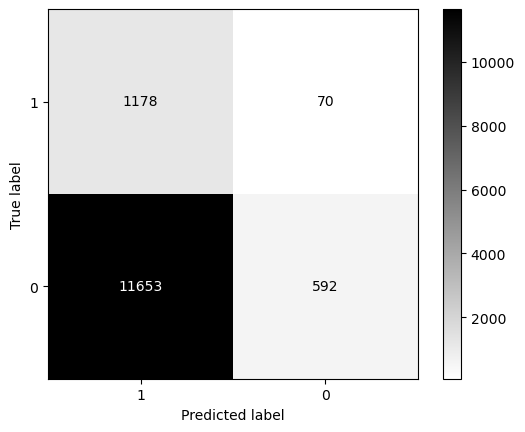

In [57]:
# Define os hiperparâmetros a serem testados
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverso da força de regularização
}

# Cria o classificador Regressão Logística
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_balanced, y_train_balanced)

# Define gridsearch com cross validation
clf = GridSearchCV(lr, parameters, cv=5, scoring='recall')

# Treina o classificador Regressão Logística usando GridSearchCV
clf.fit(X_train_balanced, y_train_balanced)

# Obtém o melhor classificador Regressão Logística
best_lr = clf.best_estimator_

print(best_lr)

# Faz previsões com o modelo otimizado
y_pred = best_lr.predict(X_test)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plota a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1, 0], zero_division=1))


### **Naive Bayes**

NBayes, recall: 0.927737


              precision    recall  f1-score   support

           1       0.09      0.92      0.17      1248
           0       0.89      0.07      0.13     12245

    accuracy                           0.15     13493
   macro avg       0.49      0.49      0.15     13493
weighted avg       0.82      0.15      0.13     13493



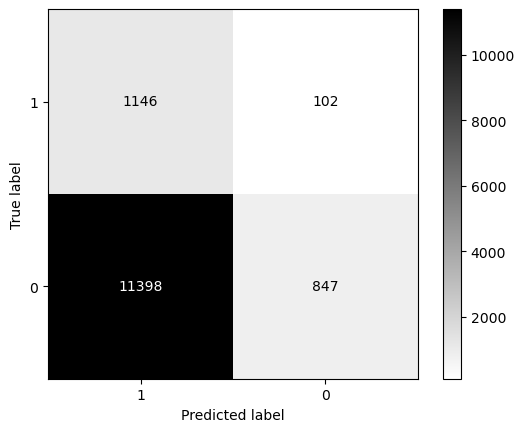

In [58]:
# Cria e treina usando a classificação Naive Bayes
nb = GaussianNB()
#Para este algiritmo não precisamos de normalizar os dados
nb.fit(X_train_balanced, y_train_balanced)

# Faz previsoes no dataset
y_pred = nb.predict(X_test)

cv_results = cross_val_score(nb, X_train_balanced, y_train_balanced, scoring='recall', cv=5)

print("%s: %f" % ("NBayes, recall", cv_results.mean()))


# Evaluate the model

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')

print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

## **KNeighbors**

#### O codigo seguinte estará comentado, uma vez que server para identifica ro valor de K e é computacionalmente exigente, os resultados estarão em Mardown depois do código

In [59]:
# #Chosing the best K value using K-fold cross validation
 
# kvalues = []
# cv_recall = []
# cv_scores = []

# stdScaler = StandardScaler()
# Xstd_train_balanced = stdScaler.fit_transform(X_train_balanced)
# Xstd_test = stdScaler.fit_transform(X_test)
 
# #K from 1...151 odd numbers #151 iterações com
# for i in range(1, 15, 2): # de 2 em 2
#     kvalues.append(i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     #crossValidation
#     cv_recall = cross_val_score(knn, Xstd_train_balanced, y_train_balanced, scoring = 'recall', cv = 5) #recall pois como vimos acima é este que queremos otimizar
#     cv_scores.append(np.mean(cv_recall))
   
#     #knn = algoritmo; Xstd_train => conjunto de treino normalizado; y_train => conjunto de treino; scoring = 'recall' => queremos que concentre no recall; cv = 5 => cross validation com 5 folds
# results = pd.DataFrame({'K': kvalues, 'recall': cv_scores})
# results

### Resultados:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>K</th>
      <th>recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0.859540</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>0.855925</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>0.846719</td>
    </tr>
    <tr>
      <th>3</th>
      <td>7</td>
      <td>0.837704</td>
    </tr>
    <tr>
      <th>4</th>
      <td>9</td>
      <td>0.829902</td>
    </tr>
    <tr>
      <th>5</th>
      <td>11</td>
      <td>0.824051</td>
    </tr>
    <tr>
      <th>6</th>
      <td>13</td>
      <td>0.818913</td>
    </tr>
  </tbody>
</table>
</div>

KNeighbors, recall: 0.859540


              precision    recall  f1-score   support

           1       0.10      0.20      0.13      1248
           0       0.91      0.81      0.86     12245

    accuracy                           0.75     13493
   macro avg       0.50      0.51      0.49     13493
weighted avg       0.83      0.75      0.79     13493



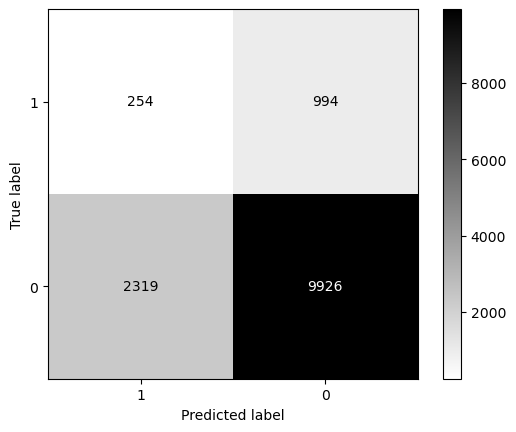

In [60]:
#StandardScaler transforms data so each feature 
#have zero_mean and unit standard-deviation

stdScaler = StandardScaler()
Xstd_train_balanced = stdScaler.fit_transform(X_train_balanced)
Xstd_test = stdScaler.fit_transform(X_test)

# print("Normalized Train Data", Xstd_train_balanced)
# print("Normalized Test Data", Xstd_test)

clf = KNeighborsClassifier(n_neighbors=1)

#Creating teh model on training data
knn = clf.fit(Xstd_train_balanced, y_train_balanced)  
y_pred = knn.predict(Xstd_test)

scores = cross_val_score(knn, Xstd_train_balanced, y_train_balanced, scoring = 'recall', cv = 5) 

print("%s: %f" % ("KNeighbors, recall", scores.mean()))

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))

## Valores de crovalidation e matriz de confusão diferentes:
o resultado do cross-validation reflete a performance do modelo em conjuntos de treino equilibrados, enquanto a matriz de confusão e o relatório de desempenho no conjunto de teste refletem a performance do modelo em dados reais, que podem ser desiquilibrados. Esta diferença na distribuição dos dados pode explicar a disparidade nos resultados de recall entre o cross-validation e a avaliação no conjunto de teste.
## No entanto houve uma pequena melhoria dos resultados, expecialmente para a **Regressão Logica** e **Naive Bayes**

## **RandomForest**



              precision    recall  f1-score   support

           1       0.08      0.14      0.11      1248
           0       0.91      0.84      0.87     12245

    accuracy                           0.78     13493
   macro avg       0.50      0.49      0.49     13493
weighted avg       0.83      0.78      0.80     13493



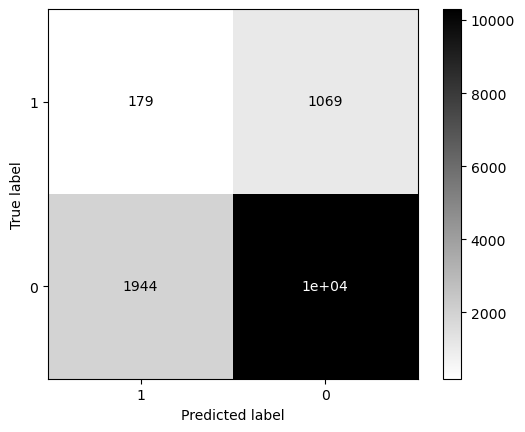

In [61]:
# Inicializa o modelo RandomForest com os dados de treino
RndForest = RandomForestClassifier()
RndForest.fit(X_train_balanced, y_train_balanced)  # Ajusta o modelo com os dados de treino

# Define os hiperparâmetros a serem testados
parameters = {
    'n_estimators': [5, 10, 15],  # Número de árvores na floresta
    'max_depth': [None, 5, 10, 20],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em uma folha
}

# Utiliza o GridSearchCV para encontrar os melhores hiperparâmetros
clf = GridSearchCV(RndForest, parameters, cv=5, scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)  # Ajusta o modelo com os melhores hiperparâmetros

# Obtém o melhor classificador RandomForest
best_rf = clf.best_estimator_

# Faz previsões com o modelo otimizado
y_pred = best_rf.predict(X_test)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plota a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1, 0]))


In [62]:
recall_score(y_test,y_pred) #outra forma de determinar o valor de recall do modelo

0.14342948717948717

### De acordo com os resultados obtidos, podemos observar uma ligeira melhoria nos resultados de **recall** para os algoritmos de **KNeighboors**, **RandomForest** e muito boa para **LogisticRegression** e **Naive Bayes**.

## Vamos fazer novamente estes testes com o uso de outro metodo de seleção de *fetures*. Utilizaremos o **RandomForest**
### Temos que usar o get_dummies(), porque o RandomForest apenas aceita os dados desta forma
### Manteremos o equilibrio das classes no dados de treino, usando um equilibrio híbrido

In [63]:
data_encoded = pd.get_dummies(df, columns=categFeatures)  # Aplica One-Hot Encoding nas colunas categóricas
data_encoded

Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0            10000          32236             12329.36286    59   
1             3609          11940             12191.99692    59   
2            28276           9311             21603.22455    59   
3            11170           6954             17877.15585    59   
4            16890          13226             13539.92667    59   
...            ...            ...                     ...   ...   
67458        13601           6848             13175.28583    59   
67459         8323          11046             15637.46301    59   
67460        15897          32921             12329.45775    59   
67461        16567           4975             21353.68465    59   
67462        15353          29875             14207.44860    59   

       Interest Rate  Employment Duration  Debit to Income  \
0          11.135007         176346.62670        16.284758   
1          12.237563          39833.92100        15.412409   
2          12.545884          91506.69105        28.137619   
3          16.731201         108286.57590        18.043730   
4          15.008300          44234.82545        17.209886   
...              ...                  ...              ...   
67458       9.408858          83961.15003        28.105127   
67459       9.972104          65491.12817        17.694279   
67460      19.650943          34813.96985        10.295774   
67461      13.169095          96938.83564         7.614624   
67462      16.034631         105123.15580        16.052112   

       Delinquency - two years  Inquires - six months  Open Account  \
0                            1                      0            13   
1                            0                      0            12   
2                            0                      0            14   
3                            1                      0             7   
4                            1                      3            13   
...                        ...                    ...           ...   
67458                        1                      0            13   
67459                        0                      0            12   
67460                        0                      0             7   
67461                        0                      0            14   
67462                        0                      0            30   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
0                  0              24246            74.932551               7   
1                  0                812            78.297186              13   
2                  0               1843             2.073040              20   
3                  0              13819            67.467951              12   
4                  1               1544            85.250761              22   
...              ...                ...                  ...             ...   
67458              0               4112            97.779389              19   
67459              0               9737            15.690703              14   
67460              1               2195             1.500090               9   
67461              0               1172            68.481882              15   
67462              0               8762            81.692328              16   

       Total Received Interest  Total Received Late Fee   Recoveries  \
0                  2929.646315                 0.102055     2.498291   
1                   772.769385                 0.036181     2.377215   
2                   863.324396                18.778660     4.316277   
3                   288.173196                 0.044131     0.107020   
4                   129.239553                19.306646  1294.818751   
...                        ...                      ...          ...   
67458              1978.945960                 0.023478   564.614852   
67459              3100.803125                 0.027095     2.01549

In [64]:
X=data_encoded.drop('Loan Status', axis=1)
y=data_encoded['Loan Status']

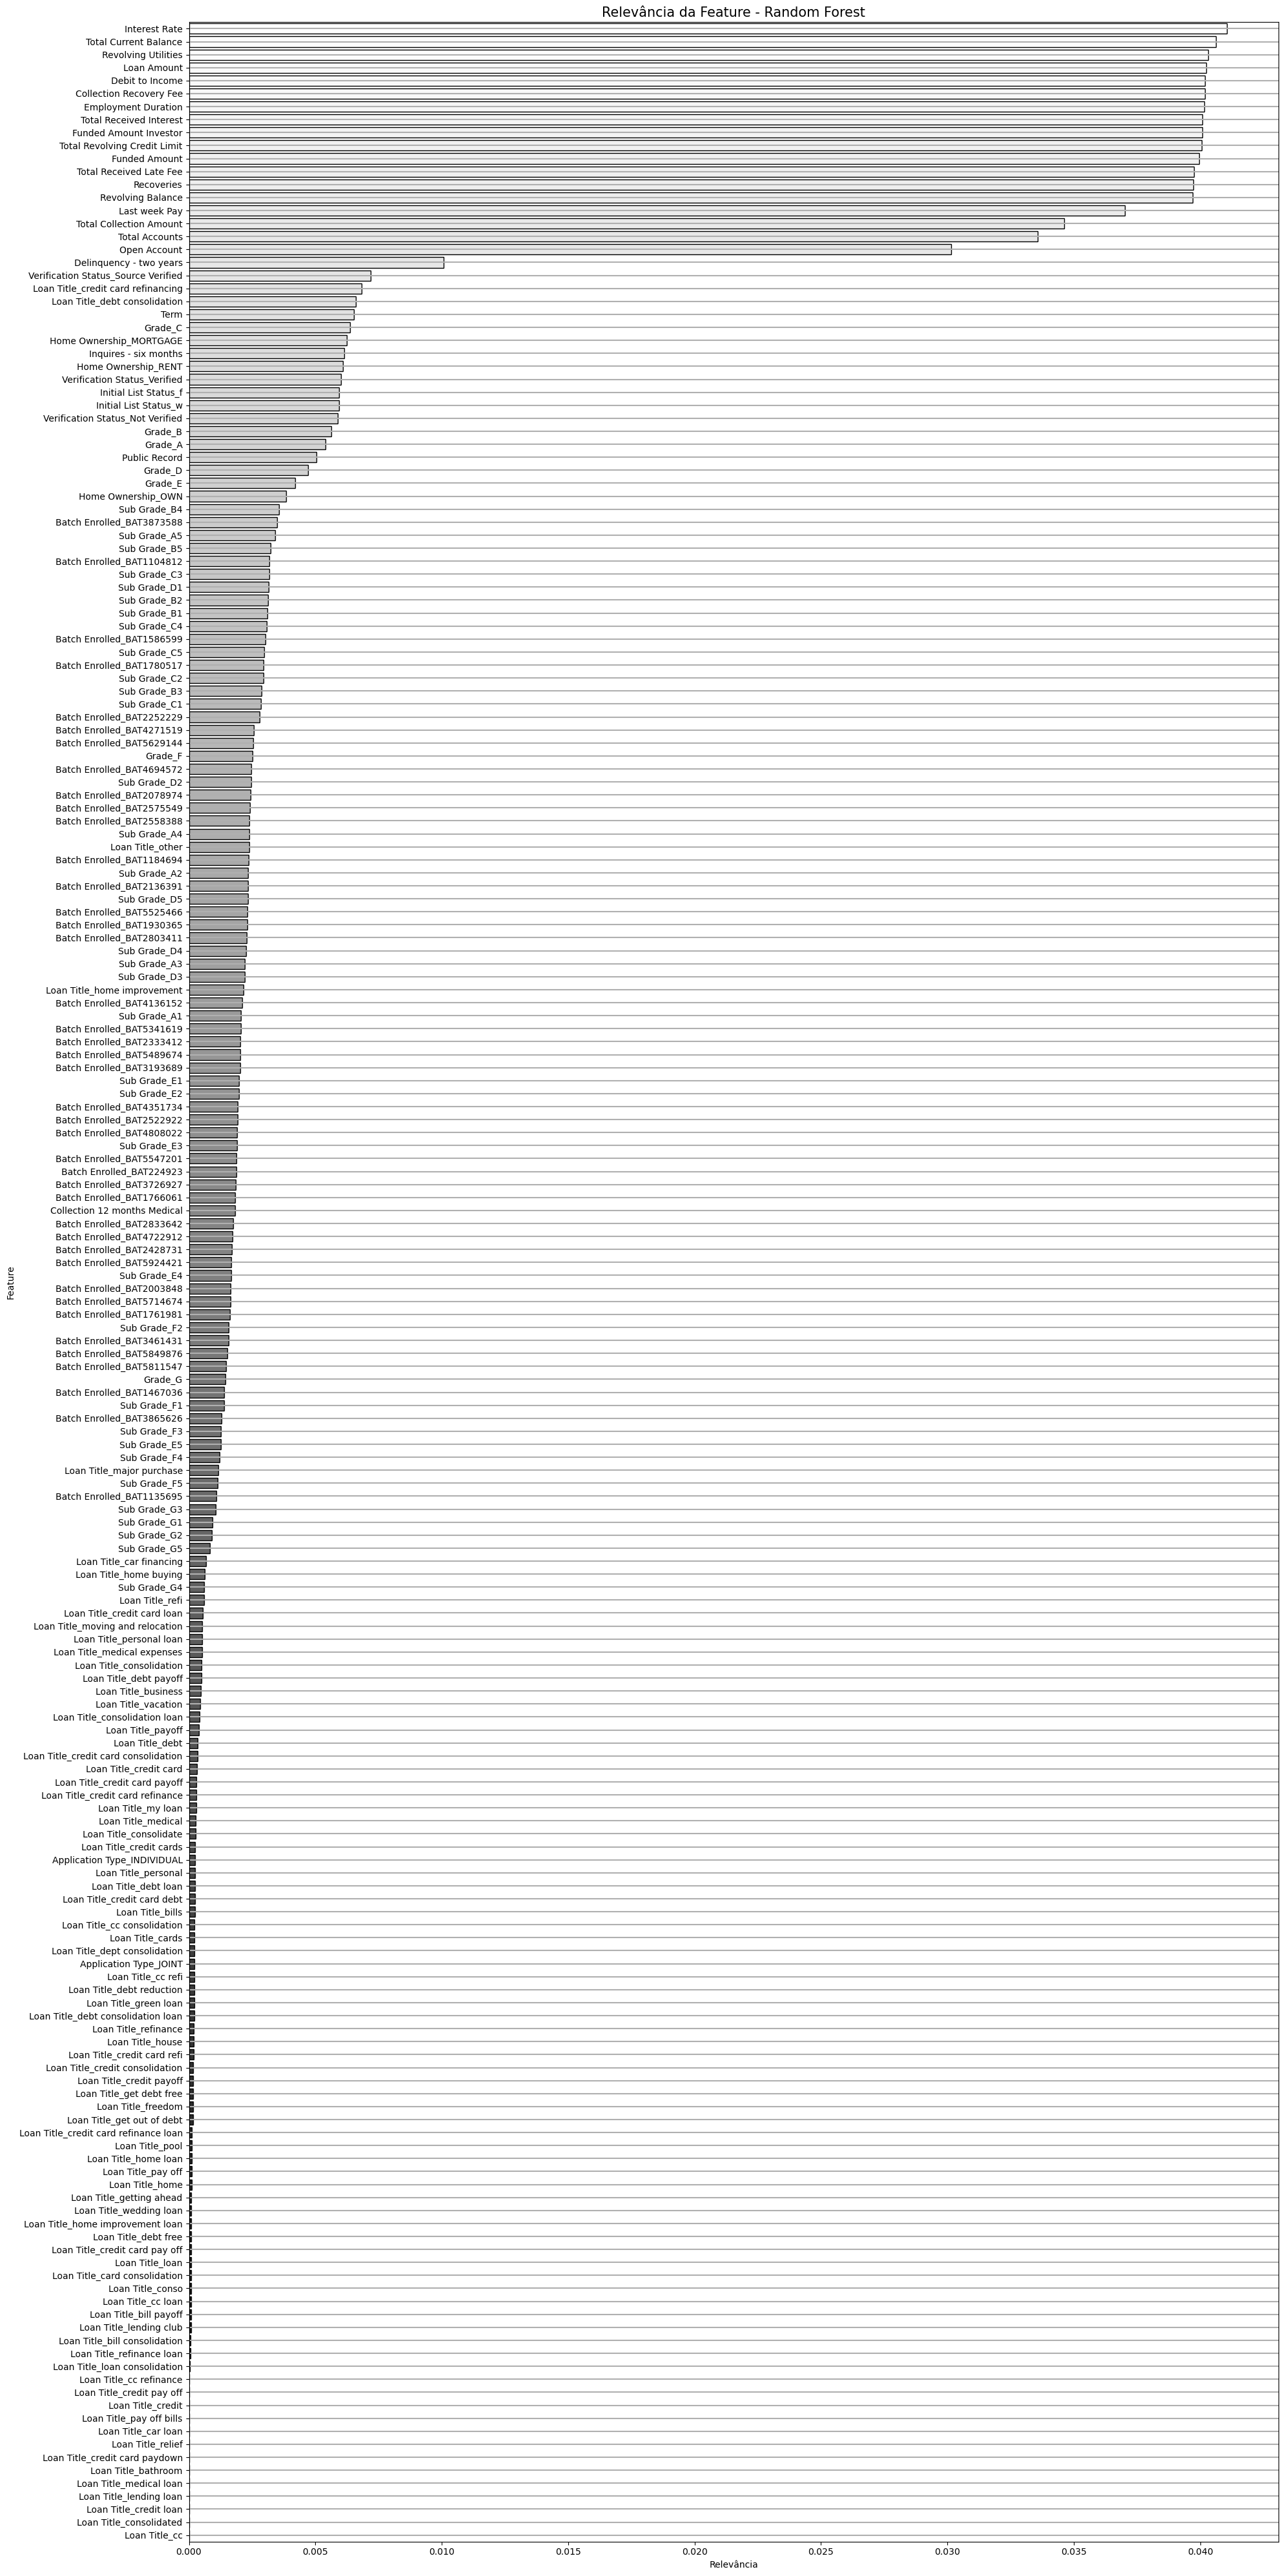

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
df_importance = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})

# Sort the DataFrame by importance in descending order
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False )

plt.figure(figsize=(20, 40))  # Adjust the figure size

# Plot the feature importance with grid lines for spacing
ax = sns.barplot(data=df_importance_sorted, x='importance', y='feature', palette='gist_yarg', edgecolor='black')

# Set x-axis label
ax.set_xlabel('Relevância')

# Set y-axis label
ax.set_ylabel('Feature')

# Set title
plt.title('Relevância da Feature - Random Forest', fontsize=15)

# Adjust the grid lines to provide spacing between features
ax.grid(linestyle='-', linewidth=1.5, axis='y')

plt.tight_layout()  # Adjust the spacing
plt.show()

### Vamos escolher as primeiras 14 *features*, visto que são as mais relevantes de acordo com o RandomForest

In [66]:
df_RndFSelectedFeatures = list(df_importance_sorted.iloc[0:14,:]['feature'].unique())
df_RndFSelectedFeatures

['Interest Rate',
 'Total Current Balance',
 'Revolving Utilities',
 'Loan Amount',
 'Debit to Income',
 'Collection Recovery Fee',
 'Employment Duration',
 'Total Received Interest',
 'Funded Amount Investor',
 'Total Revolving Credit Limit',
 'Funded Amount',
 'Total Received Late Fee',
 'Recoveries',
 'Revolving Balance']

In [67]:
RndForestSelectedColumns = df_RndFSelectedFeatures + [goalAttrib]
df_RndFor = df[RndForestSelectedColumns]
df_RndFor.head()

Interest Rate  Total Current Balance  Revolving Utilities  Loan Amount  \
0      11.135007                 311301            74.932551        10000   
1      12.237563                 182610            78.297186         3609   
2      12.545884                  89801             2.073040        28276   
3      16.731201                   9189            67.467951        11170   
4      15.008300                 126029            85.250761        16890   

   Debit to Income  Collection Recovery Fee  Employment Duration  \
0        16.284758                 0.793724         176346.62670   
1        15.412409                 0.974821          39833.92100   
2        28.137619                 1.020075          91506.69105   
3        18.043730                 0.749971         108286.57590   
4        17.209886                 0.368953          44234.82545   

   Total Received Interest  Funded Amount Investor  \
0              2929.646315             12329.36286   
1               772.769385             12191.99692   
2               863.324396             21603.22455   
3               288.173196             17877.15585   
4               129.239553             13539.92667   

   Total Revolving Credit Limit  Funded Amount  Total Received Late Fee  \
0                          6619          32236                 0.102055   
1                         20885          11940                 0.036181   
2                         26155           9311                18.778660   
3                         60214           6954                 0.044131   
4                         22579          13226                19.306646   

    Recoveries  Revolving Balance  Loan Status  
0     2.498291              24246            0  
1     2.377215                812            0  
2     4.316277               1843            0  
3     0.107020              13819            0  
4  1294.818751               1544            0

In [68]:
X=df_RndFor.iloc[:,:-1]
y=df_RndFor['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

smote_tomek = SMOTETomek(random_state=42)
# Aplicar SMOTE apenas no conjunto de treino
X_train_balanced, y_train_balanced = smote_tomek.fit_resample(X_train, y_train)

### **Regressão Logística**

LogisticRegression(C=0.001, max_iter=1000)


              precision    recall  f1-score   support

           1       0.09      0.44      0.15      1248
           0       0.91      0.56      0.69     12245

    accuracy                           0.55     13493
   macro avg       0.50      0.50      0.42     13493
weighted avg       0.83      0.55      0.64     13493



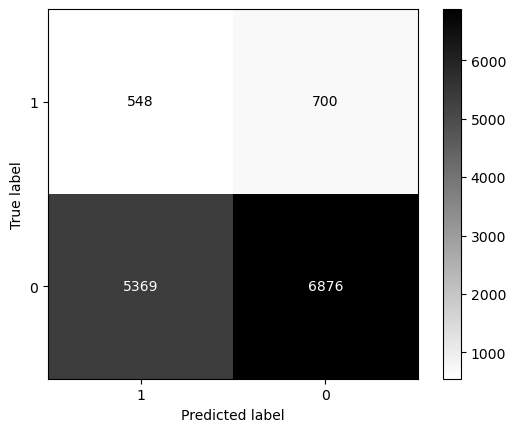

In [69]:
# Define os hiperparâmetros a serem testados
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverso da força de regularização
}

# Cria o classificador Regressão Logística
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_balanced, y_train_balanced)

# Define gridsearch com cross validation
clf = GridSearchCV(lr, parameters, cv=5, scoring='recall')

# Treina o classificador Regressão Logística usando GridSearchCV
clf.fit(X_train_balanced, y_train_balanced)

# Obtém o melhor classificador Regressão Logística
best_lr = clf.best_estimator_

print(best_lr)

# Faz previsões com o modelo otimizado
y_pred = best_lr.predict(X_test)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plota a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1, 0], zero_division=1))


### **Naive Bayes**

NBayes, recall: 0.835594


              precision    recall  f1-score   support

           1       0.09      0.72      0.16      1248
           0       0.91      0.27      0.42     12245

    accuracy                           0.32     13493
   macro avg       0.50      0.50      0.29     13493
weighted avg       0.83      0.32      0.40     13493



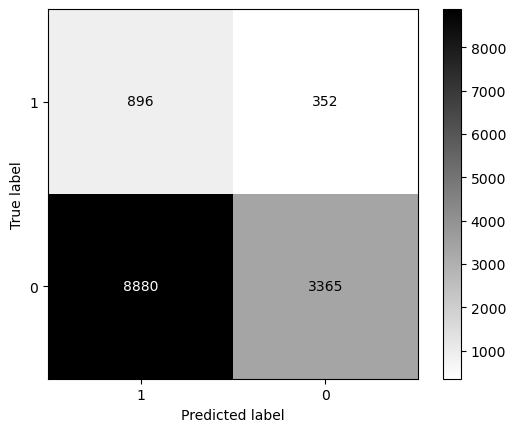

In [70]:
# Cria e treina usando a classificação Naive Bayes
nb = GaussianNB()
#Para este algiritmo não precisamos de normalizar os dados
nb.fit(X_train_balanced, y_train_balanced)

# Faz previsoes no dataset
y_pred = nb.predict(X_test)

cv_results = cross_val_score(nb, X_train_balanced, y_train_balanced, scoring='recall', cv=5)

print("%s: %f" % ("NBayes, recall", cv_results.mean()))


# Evaluate the model

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')

print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))


## **KNeighbors**

#### O codigo seguinte estará comentado, uma vez que server para identifica ro valor de K e é computacionalmente exigente, os resultados estarão em Mardown depois do código

In [71]:
# #Chosing the best K value using K-fold cross validation
 
# kvalues = []
# cv_recall = []
# cv_scores = []

# stdScaler = StandardScaler()
# Xstd_train_balanced = stdScaler.fit_transform(X_train_balanced)
# Xstd_test = stdScaler.fit_transform(X_test)
 
# #K from 1...151 odd numbers #151 iterações com
# for i in range(1, 15, 2): # de 2 em 2
#     kvalues.append(i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     #crossValidation
#     cv_recall = cross_val_score(knn, Xstd_train_balanced, y_train_balanced, scoring = 'recall', cv = 5) #recall pois como vimos acima é este que queremos otimizar
#     cv_scores.append(np.mean(cv_recall))
   
#     #knn = algoritmo; Xstd_train => conjunto de treino normalizado; y_train => conjunto de treino; scoring = 'recall' => queremos que concentre no recall; cv = 5 => cross validation com 5 folds
# results = pd.DataFrame({'K': kvalues, 'recall': cv_scores})
# results


# Resultados:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>K</th>
      <th>recall</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0.974385</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3</td>
      <td>0.971860</td>
    </tr>
    <tr>
      <th>2</th>
      <td>5</td>
      <td>0.967755</td>
    </tr>
    <tr>
      <th>3</th>
      <td>7</td>
      <td>0.962419</td>
    </tr>
    <tr>
      <th>4</th>
      <td>9</td>
      <td>0.954209</td>
    </tr>
    <tr>
      <th>5</th>
      <td>11</td>
      <td>0.945239</td>
    </tr>
    <tr>
      <th>6</th>
      <td>13</td>
      <td>0.937275</td>
    </tr>
  </tbody>
</table>
</div>

KNeighbors, recall: 0.974385


              precision    recall  f1-score   support

           1       0.09      0.31      0.14      1248
           0       0.91      0.68      0.78     12245

    accuracy                           0.65     13493
   macro avg       0.50      0.50      0.46     13493
weighted avg       0.83      0.65      0.72     13493



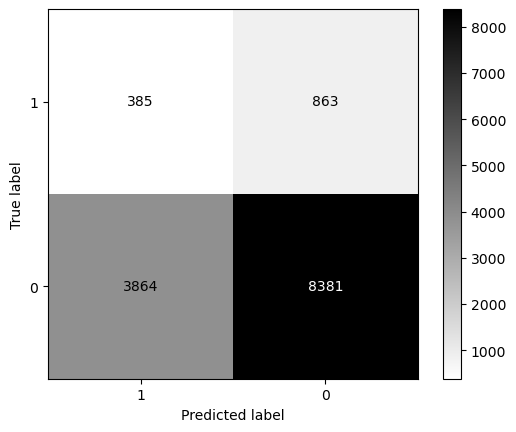

In [72]:
stdScaler = StandardScaler()
Xstd_train_balanced = stdScaler.fit_transform(X_train_balanced)
Xstd_test = stdScaler.fit_transform(X_test)

clf = KNeighborsClassifier(n_neighbors=1)

#Creating teh model on training data
knn = clf.fit(Xstd_train_balanced, y_train_balanced)  
y_pred = knn.predict(Xstd_test)

scores = cross_val_score(knn, Xstd_train_balanced, y_train_balanced, scoring = 'recall', cv = 5) 

print("%s: %f" % ("KNeighbors, recall", scores.mean()))

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0]))


## **RandomForest**



              precision    recall  f1-score   support

           1       0.11      0.22      0.14      1248
           0       0.91      0.81      0.86     12245

    accuracy                           0.76     13493
   macro avg       0.51      0.52      0.50     13493
weighted avg       0.84      0.76      0.79     13493



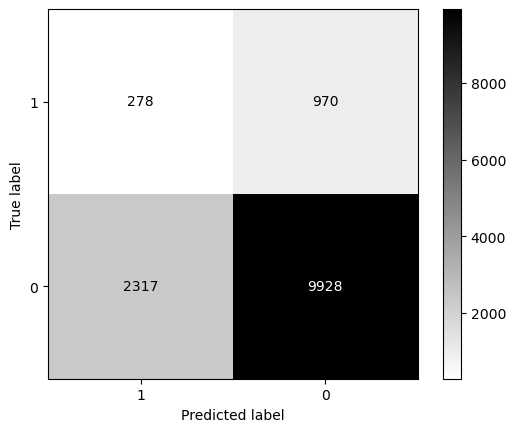

In [74]:
# Inicializa o modelo RandomForest com os dados de treino
RndForest = RandomForestClassifier()
RndForest.fit(X_train_balanced, y_train_balanced)  # Ajusta o modelo com os dados de treino

# Define os hiperparâmetros a serem testados
parameters = {
    'n_estimators': [5, 10,],  # Número de árvores na floresta
    'max_depth': [None, 5, 10],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de amostras necessárias em uma folha
}

# Utiliza o GridSearchCV para encontrar os melhores hiperparâmetros
clf = GridSearchCV(RndForest, parameters, cv=5, scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)  # Ajusta o modelo com os melhores hiperparâmetros

# Obtém o melhor classificador RandomForest
best_rf = clf.best_estimator_

# Faz previsões com o modelo otimizado
y_pred = best_rf.predict(X_test)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plota a matriz de confusão usando ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1, 0]))

In [76]:
best_rf 

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=10)

### O Seguinte código estará comentado por razões de performance os resultados obtidos estaram em Mardown

In [ ]:
# # Definição do modelo de arvore de decisao
# decision_tree = DecisionTreeClassifier(random_state=42)

# # Treino do modelo
# decision_tree.fit(X_train_balanced, y_train_balanced)


# # Definição do grid de parâmetros a serem testados
# param_grid = {
#     'max_depth': [5, 10, 15, 30, 50, 80],
#     'min_samples_leaf': [1, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'max_leaf_nodes':[10, 20, 40, 80, 160, 320]
# }

# # Criação do objeto GridSearchCV
# grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='recall')

# # Treino od modelo com os dados de treinamento balanceados
# grid_search.fit(X_train_balanced, y_train_balanced)

# # Obter os melhores parâmetros
# best_params = grid_search.best_params_
# print("Melhores parâmetros encontrados:", best_params)


Melhores parâmetros encontrados: {'max_depth': 15, 'max_leaf_nodes': 320, 'min_samples_leaf': 10, 'min_samples_split': 2}


#### Melhores parâmetros encontrados: {'max_depth': 15, 'max_leaf_nodes': 320, 'min_samples_leaf': 10, 'min_samples_split': 2}

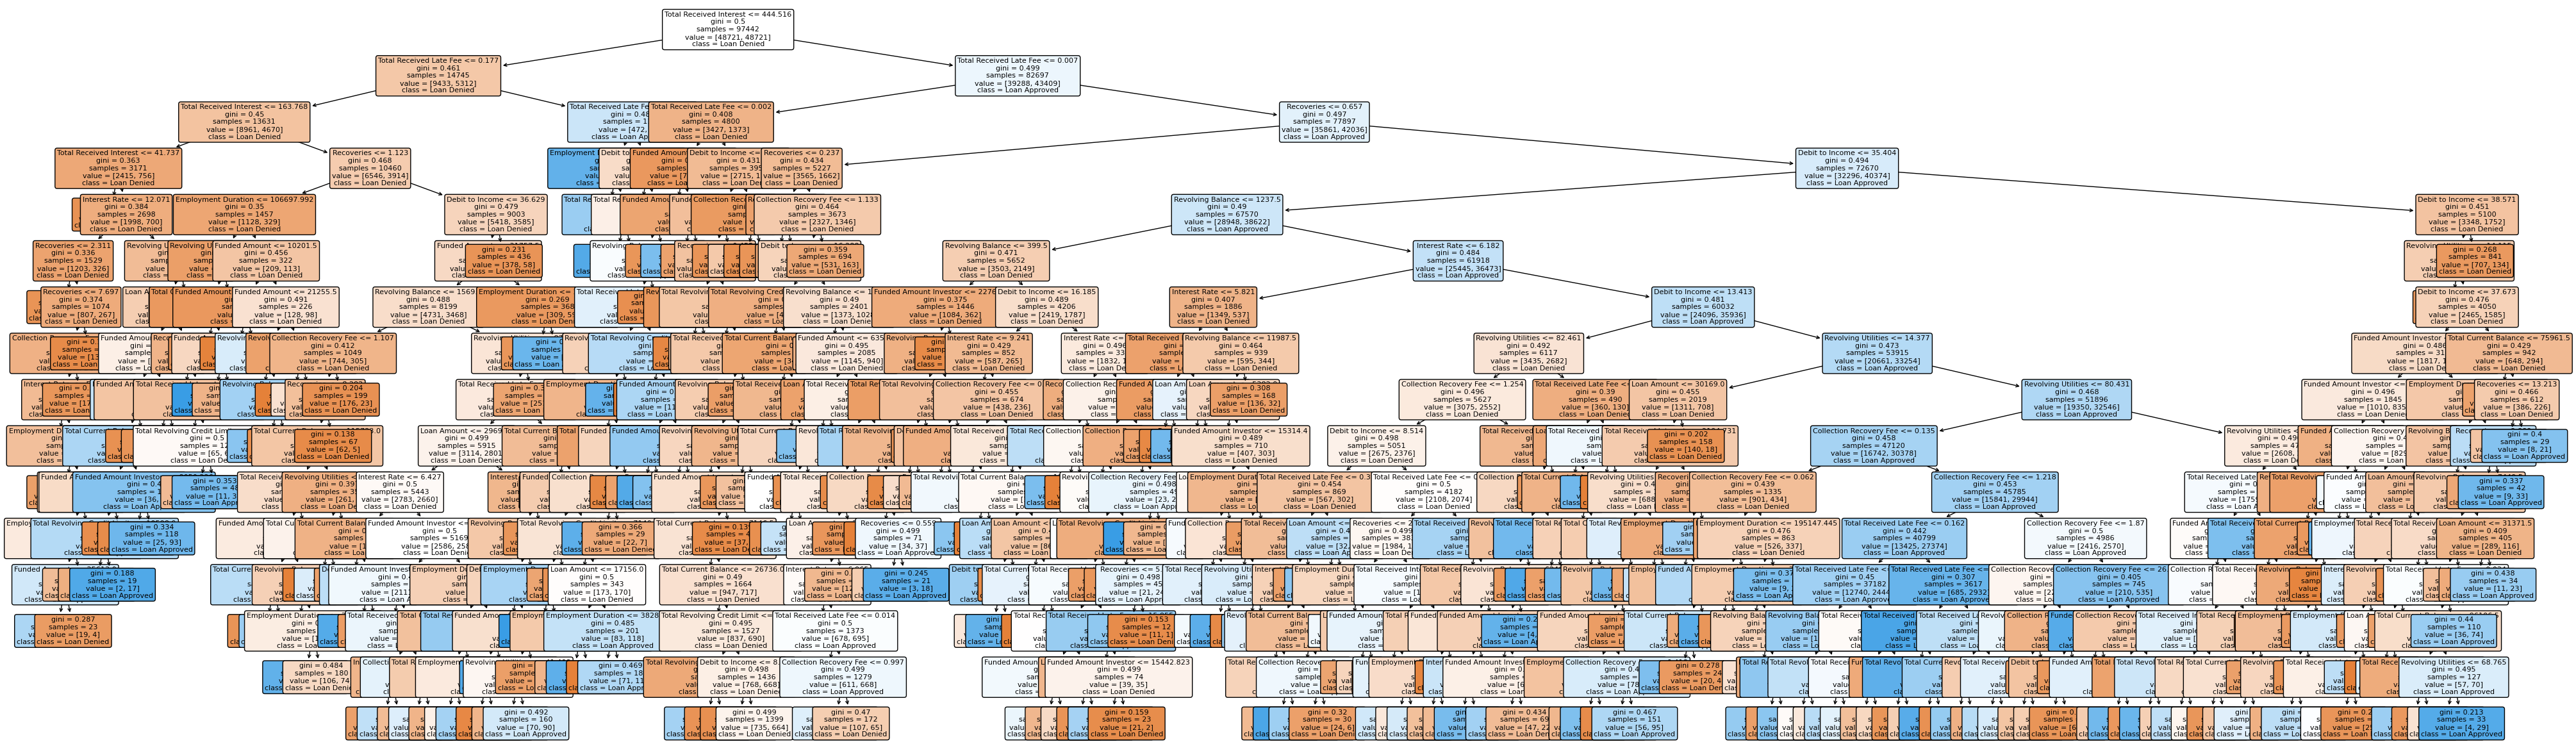



              precision    recall  f1-score   support

           1       0.10      0.46      0.16      1248
           0       0.91      0.55      0.69     12245

    accuracy                           0.55     13493
   macro avg       0.50      0.51      0.42     13493
weighted avg       0.83      0.55      0.64     13493



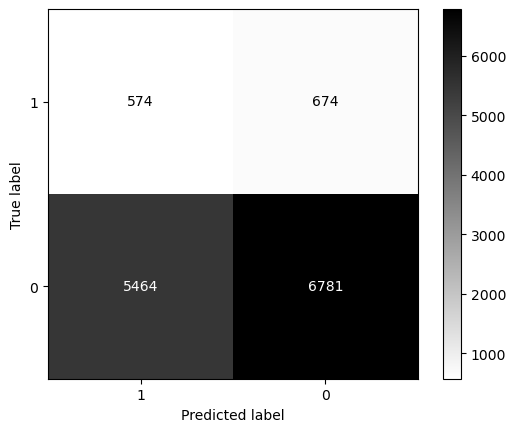

In [75]:
# Defir o modelo de arvore de decisao
decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=2, max_leaf_nodes=320,random_state=42)

# Treino do modelo
decision_tree.fit(X_train_balanced, y_train_balanced)

# Previsão do conjunto de teste
y_pred = decision_tree.predict(X_test)

# Visualizar a árvore de decisão
plt.figure(figsize=(50, 15))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Loan Denied', 'Loan Approved'], rounded=True, fontsize=8) #class_names=['Loan Denied', 'Loan Approved']
plt.show()

cm=confusion_matrix(y_test, y_pred, labels=[1,0])
# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(cmap='gist_yarg')
print("\n")
print(classification_report(y_test, y_pred, labels=[1,0], zero_division=1))